<a href="https://colab.research.google.com/github/b10cay0/AcademicPerformance/blob/main/AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
import random

In [ ]:
import seaborn as sb

# Scaler, train test split y grid search cv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# métodos de machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Scores
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

# Matriz de confusión
from sklearn.metrics import confusion_matrix

# importamos make_scorer para crear callable de matthews
from sklearn.metrics import make_scorer

mcc=make_scorer(matthews_corrcoef)

In [ ]:
# # creamos función para plotear matriz de confusión
# def plot_mc(mc):
#     labels=["-4","-3","-2","-1","0","1"]
#     sb.set(color_codes=True)
#     plt.figure(1, figsize=(9, 6))

#     plt.title("Matriz de confusión")

#     sb.set(font_scale=1.4)
#     ax = sb.heatmap(mc, annot=True, cmap="Blues", cbar_kws={'label': 'Escala'},fmt='g')

#     ax.set_xticklabels(labels)
#     ax.set_yticklabels(labels)

#     ax.set(ylabel="Valor verdadero", xlabel="Valor predecido")

In [ ]:
df = pd.read_csv('cuestionarios y calif 2.csv')
np.set_printoptions(precision=6)

# Ordenamos los datos

In [ ]:
# aislamos los datos
daspost = df.filter(items=['das d post','das e post', 'das a post'])
daspost = daspost.to_numpy()[0:-1]
dasprev = df.filter(items=['das d prev','das e prev', 'das a prev'])
dasprev = dasprev.to_numpy()[0:-1]

calif = df.filter(items=['delta rend'])

calif = calif.to_numpy()[0:-1]

# transformamos las caracteristicas a valores numéricos
le = LabelEncoder()
le.fit(['No presenta','Leve','Moderado','Severo','Extremadamente Severo'])
dasprev[:,0] = le.transform(dasprev[:,0])
dasprev[:,1] = le.transform(dasprev[:,1])
dasprev[:,2] = le.transform(dasprev[:,2])

daspost[:,0] = le.transform(daspost[:,0])
daspost[:,1] = le.transform(daspost[:,1])
daspost[:,2] = le.transform(daspost[:,2])

das=daspost-dasprev
for x,i in enumerate(das[:,0]):
  if i > 0:
    das[x,0] = 1
  elif i < 0:
    das[x,0] = -1
for x,i in enumerate(das[:,1]):
  if i > 0:
    das[x,1] = 1
  elif i < 0:
    das[x,1] = -1
for x,i in enumerate(das[:,2]):
  if i > 0:
    das[x,2] = 1
  elif i < 0:
    das[x,2] = -1


# aislamos los datos
perf = df.filter(items=['act','sens', 'vis','sec'])
perf = perf.to_numpy()[0:-1]

perf[:,0]=[1 if i > 0 else 0 for i in perf[:,0].astype(float)]
perf[:,1]=[1 if i > 0 else 0 for i in perf[:,1].astype(float)]
perf[:,2]=[1 if i > 0 else 0 for i in perf[:,2].astype(float)]
perf[:,3]=[1 if i > 0 else 0 for i in perf[:,3].astype(float)]

# aislamos los datos
ssipost = df.filter(items=['ssi post'])
ssiprev = df.filter(items=['ssi prev'])
ssipost = ssipost.to_numpy()[0:-1]
ssiprev = ssiprev.to_numpy()[0:-1]


# transformamos las caracteristicas a valores numéricos
# categorías ssi
le.fit(['Estrés leve','Estrés moderado','Estrés severo'])
ssipost = le.transform(ssipost).reshape(-1,1)
ssiprev = le.transform(ssiprev).reshape(-1,1)

ssi = ssipost - ssiprev

ssi=ssi.astype(float)
for x,i in enumerate(ssi[:]):
  if i > 0:
    ssi[x] = 1
  elif i < 0:
    ssi[x] = -1

datos=np.hstack([das.astype(float),perf,ssi])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# adaptamos el vector de calificaciones para usarlo como mapa de colores
# calif1=[int(i[0]+4) for i in calif]
for x,i in enumerate(calif):
  if i > 0:
    calif[x] = 1
  elif i == 0:
    calif[x] = 0
  else:
    calif[x] = -1

calif = np.ravel(calif)

# Ploteamos delta-DAS y delta-calificaciones

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1,
                    specs=[ [{'type':'scatter3d'} ] ])

fig.add_trace(
    go.Scatter3d(x=das[:,0]+np.random.rand(48,)/8,
            y=das[:,1]+np.random.rand(48,)/8,
            z=das[:,2]+np.random.rand(48,)/8,
            mode='markers',
            marker=dict(color=calif,size=4,colorscale='plotly3')
            )
)


fig.update_layout(height=600,
                  width=600,
                  title_text="DAS/Calificaciones",
                  scene = dict(
                    xaxis_title='Depresión',
                    yaxis_title='Ansiedad',
                    zaxis_title='Estrés')
                  )
fig.show()


In [ ]:
fig = make_subplots(rows=1, cols=1,
                    specs=[ [{'type':'scatter3d'} ] ])

fig.add_trace(
    go.Scatter3d(x=perf[:,0]+np.random.rand(48,)/10,
            y=perf[:,1]+np.random.rand(48,)/10,
            z=perf[:,3]+np.random.rand(48,)/10,
            mode='markers',
            marker=dict(color=calif,size=4,colorscale='plotly3')
            )
)


fig.update_layout(height=600,
                  width=600,
                  title_text="Perfiles/Calificaciones",
                  scene = dict(
                    xaxis_title='Sensorial/Intuitivo',
                    yaxis_title='Visual/Verbal',
                    zaxis_title='Secuencial/Global')
                  )
fig.show()


In [ ]:
fig = make_subplots(rows=1, cols=1,
                    specs=[ [{'type':'scatter3d'} ] ])

fig.add_trace(
    go.Scatter3d(x=perf[:,0]+np.random.rand(48,)/10,
            y=perf[:,1]+np.random.rand(48,)/10,
            z=perf[:,2]+np.random.rand(48,)/10,
            mode='markers',
            marker=dict(color=calif,size=4,colorscale='plotly3')
            )
)


fig.update_layout(height=600,
                  width=600,
                  title_text="Perfiles/Calificaciones",
                  scene = dict(
                    xaxis_title='Sensorial/Intuitivo',
                    yaxis_title='Visual/Verbal',
                    zaxis_title='Activo/Reflexivo')
                  )
fig.show()


In [ ]:
ssi.ravel()

array([ 0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
fig = make_subplots(rows=1, cols=1,
                    specs=[ [{'type':'scatter3d'} ] ])

fig.add_trace(
    go.Scatter3d(x=ssi.ravel()+np.random.rand(48,)/10,
            y=np.random.rand(48,)*0,
            z=np.random.rand(48,)*0,
            mode='markers',
            marker=dict(color=calif,size=4,colorscale='plotly3')
            )
)


fig.update_layout(height=600,
                  width=600,
                  title_text="SSI/Calificaciones",
                  scene = dict(
                    xaxis_title='SSI',
                    yaxis_title='',
                    zaxis_title='')
                  )
fig.show()


In [ ]:
# Exportar los datos
# datos_csv = pd.DataFrame({'delta_D_DAS': das[:,0].reshape(1,-1), 'delta_A_DAS': das[:,1].reshape(1,-1),'delta_S_DAS': das[:,2].reshape(1,-1),'delta_ssi': ssi.reshape(1,-1),'activo': perf[:,0].reshape(1,-1),'sensorial': perf[:,1].reshape(1,-1),'visual': perf[:,2].reshape(1,-1),'secuencial': perf[:,3].reshape(1,-1)})

ValueError: Per-column arrays must each be 1-dimensional

# W de Kendall

In [ ]:
pip install kendall-w

In [ ]:
np.vstack((dasprev[:,0], daspost[:,0])).tolist()

[[4,
  3,
  1,
  1,
  2,
  0,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  2,
  3,
  3,
  3,
  0,
  1,
  2,
  3,
  3,
  2,
  2,
  3,
  3,
  3,
  0,
  2,
  3,
  1,
  2,
  1,
  4,
  0,
  2,
  0,
  3,
  1,
  0,
  3,
  2,
  0,
  3,
  0,
  2,
  1,
  2],
 [0,
  3,
  3,
  3,
  4,
  0,
  2,
  3,
  3,
  2,
  3,
  0,
  3,
  3,
  3,
  3,
  1,
  2,
  3,
  4,
  3,
  1,
  1,
  0,
  3,
  3,
  2,
  0,
  3,
  3,
  2,
  2,
  3,
  1,
  2,
  1,
  0,
  3,
  2,
  0,
  0,
  4,
  0,
  3,
  0,
  4,
  2,
  1]]

In [ ]:
import kendall_w as kw

ssi_data_for_w=np.transpose(np.hstack((ssiprev, ssipost))).tolist()
ssi_w = kw.compute_w(ssi_data_for_w)

d_data_for_w=np.vstack((dasprev[:,0], daspost[:,0])).tolist()
d_w=kw.compute_w(d_data_for_w)

a_data_for_w=np.vstack((dasprev[:,1], daspost[:,1])).tolist()
a_w=kw.compute_w(a_data_for_w)

s_data_for_w=np.vstack((dasprev[:,2], daspost[:,2])).tolist()
s_w=kw.compute_w(s_data_for_w)

print("W de Kendall para los datos del SSI: ",ssi_w)
print("Coeficiente Kappa para los datos de depresión del DAS: ",d_w)
print("Coeficiente Kappa para los datos de ansiedad del DAS: ",a_w)
print("Coeficiente Kappa para los datos de estrés del DAS: ",s_w)

W de Kendall para los datos del SSI:  0.006944444444444444
Coeficiente Kappa para los datos de depresión del DAS:  0.015625
Coeficiente Kappa para los datos de ansiedad del DAS:  0.00390625
Coeficiente Kappa para los datos de estrés del DAS:  0.07335069444444445


# Aplicamos Gaussian-Naive Bayes al conjunto sin reducción de dimensiones

In [ ]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(datos, calif, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.36918328279635887
MCC en test:  -0.236227795630767


# Aplicamos GridSearchCV para SVM a los datos sin reducir dimensionalidad

In [ ]:
calif

array([ 0., -1.,  0.,  0.,  1., -1.,  0., -1.,  1.,  0., -1., -1., -1.,
       -1.,  1.,  0.,  0., -1., -1., -1.,  0., -1.,  0., -1., -1.,  0.,
       -1.,  0.,  1., -1.,  1., -1., -1., -1.,  0., -1., -1.,  0.,  0.,
        0., -1., -1., -1., -1.,  0., -1., -1.,  0.])

In [ ]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(datos, calif, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svm_params={
    'C':[2.5,3,3.5,4],
    'kernel':('linear','poly','rbf','sigmoid'),
    'degree':[1,2,3,4],
    'gamma':('scale','auto'),
    'coef0':[0.5,1,1.5]
}
svm=SVC()
clf_svm = GridSearchCV(svm, svm_params,scoring=mcc,refit='MCC',cv=3)

# entrenamos
clf_svm.fit(X_train,y_train)

# Buscamos los mejores parametros
print(clf_svm.best_params_)
print('MCC en train: ',clf_svm.best_score_)

# predecimos X_test
svm_ypred=clf_svm.predict(X_test)
# MCC en Xtest
print('MCC en test: ',matthews_corrcoef(y_test,svm_ypred))

{'C': 3.5, 'coef0': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
MCC en train:  0.4716782360369764
MCC en test:  0.041239304942116126


In [ ]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(das+np.random.rand(48,3)/10, calif, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svm_params={
    'C':[2.5,3,3.5,4],
    'kernel':('linear','poly','rbf','sigmoid'),
    'degree':[1,2,3,4],
    'gamma':('scale','auto'),
    'coef0':[0.5,1,1.5]
}

svm=SVC()
clf_svm = GridSearchCV(svm, svm_params,scoring=mcc,refit='MCC',cv=3)

# entrenamos
clf_svm.fit(X_train,y_train)

# Buscamos los mejores parametros
print(clf_svm.best_params_)
print('MCC en train: ',clf_svm.best_score_)

# predecimos X_test
svm_ypred=clf_svm.predict(X_test)
# MCC en Xtest
print('MCC en test: ',matthews_corrcoef(y_test,svm_ypred))

{'C': 3, 'coef0': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
MCC en train:  0.47828556030295094
MCC en test:  0.0


# Aplicamos GridSearchCV para RandomForest a los datos sin reducir dimensionalidad

In [ ]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(datos, calif, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf_params={
    'n_estimators':[50,100,200],
    'criterion':('gini','entropy','log_loss'),
    'max_depth':[None,1,10,20],
}
rf=RandomForestClassifier()
clf_rf = GridSearchCV(rf, rf_params,scoring=mcc,refit='MCC',cv=2)

# entrenamos
clf_rf.fit(X_train,y_train)

# Buscamos los mejores parametros
print(clf_rf.best_params_)
print('MCC en train: ',clf_rf.best_score_)

# predecimos X_test
rf_ypred=clf_rf.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,rf_ypred))

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
MCC en train:  0.4745263444828263
MCC en test:  -0.1889822365046136


# Aplicamos GridSearchCV para KNN a los datos sin reducir dimensionalidad

In [ ]:
# Creamos conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(datos, calif, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creamos callable de mcc para usarlo para el refit del GridSearch
mcc=make_scorer(matthews_corrcoef)
scoring={
    'MCC':mcc}

# GridSearch para KNN
knn_params={
    'n_neighbors':[2,3,5,10],
    'weights':('uniform','distance'),
    'algorithm':('ball_tree','kd_tree','brute'),
    'p':[1,2,3]
}
knn=KNeighborsClassifier()
clf_knn = GridSearchCV(knn, knn_params,scoring=scoring,refit='MCC',cv=3)

# entrenamos
clf_knn.fit(X_train,y_train)

# Buscamos los mejores parametros
print(clf_knn.best_params_)
print('MCC en train: ',clf_knn.best_score_)

# predecimos X_test
knn_ypred=clf_knn.predict(X_test)
# Medimos scores
print('MCC en test: ',matthews_corrcoef(y_test,knn_ypred))

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
MCC en train:  0.5110145015961186
MCC en test:  -0.0472455591261534


# Creamos arrays para reducir dimensión con diferentes perplexidades y tasas de aprendizaje

In [ ]:
calif1 = calif

In [ ]:
# evaluaremos el desempeño de tsne y softmax para reducir dimensiones
# vamos a iterar...
# perplexity con valores de 2,3,5,10,20,30,40
# learning rate con valores de 0.1,1,10,20,50,100
lr=[0.1,1,10,20,50,100]
# creamos las variables para guardar las iteraciones del GridSearch
# sin softmax previo
datos_pxty2=[[],[],[],[],[],[]]
datos_pxty3=[[],[],[],[],[],[]]
datos_pxty5=[[],[],[],[],[],[]]
datos_pxty10=[[],[],[],[],[],[]]
datos_pxty20=[[],[],[],[],[],[]]
datos_pxty30=[[],[],[],[],[],[]]
datos_pxty40=[[],[],[],[],[],[]]

# establecemos estos hiperparámetros fijos
n_iter=5000
n_iter_without_progress=500
n_jobs=100

# ciclo for donde se ejecuta el gridsearch
for i,x in enumerate(lr):
  # sin softmax previo
  datos_pxty2[i]=TSNE(n_components=3, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty3[i]=TSNE(n_components=3, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty5[i]=TSNE(n_components=3, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty10[i]=TSNE(n_components=3, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty20[i]=TSNE(n_components=3, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty30[i]=TSNE(n_components=3, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)
  datos_pxty40[i]=TSNE(n_components=3, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(datos)

# Ploteamos y evaluamos Gaussian-Bayes para clasificar datos

## Ploteamos Perplexity 2

In [ ]:
from plotly.subplots import make_subplots

# Perplexity 2

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty2[z][:,0],
                  y=datos_pxty2[z][:,1],
                  z=datos_pxty2[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 2")
fig.show()

## Evaluamos Perplexity 2

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[0], calif1, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.4191659010471121
MCC en test:  -0.07715167498104596


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.32963059741072886
MCC en test:  -0.045834924851410566


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3657283013836088
MCC en test:  -0.37115374447904514


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.4216451547075339
MCC en test:  -0.1649572197684645


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.557787785964064
MCC en test:  0.0


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 2, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty2[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.40509574683346666
MCC en test:  -0.0472455591261534


## Ploteamos Perplexity 3

In [ ]:
# Perplexity 3

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty3[z][:,0],
                  y=datos_pxty3[z][:,1],
                  z=datos_pxty3[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 3")
fig.show()

## Evaluamos Perplexity 3

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[0], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.31866956783298556
MCC en test:  0.041239304942116126


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.023341805165694677
MCC en test:  -0.07273929674533079


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.2613918954046916
MCC en test:  -0.1649572197684645


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.29229669657587937
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.2606668780989661
MCC en test:  -0.1889822365046136


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 3, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty3[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.2990615267317582
MCC en test:  0.11572751247156893


## Ploteamos Perplexity 5

In [ ]:
# Perplexity 5

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty5[z][:,0],
                  y=datos_pxty5[z][:,1],
                  z=datos_pxty5[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 5")
fig.show()

## Evaluamos Perplexity 5

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[0], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.15494330075736037
MCC en test:  -0.1889822365046136


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.35894599601447913
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.14467284665112362
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.22573223760333366
MCC en test:  -0.3509312031717982


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.1773688106435479
MCC en test:  -0.1889822365046136


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 5, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty5[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.2984245952619171
MCC en test:  0.1259881576697424


## Ploteamos Perplexity 10

In [ ]:
# Perplexity 10

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty10[z][:,0],
                  y=datos_pxty10[z][:,1],
                  z=datos_pxty10[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 10")
fig.show()

## Evaluamos Perplexity 10

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[0], calif1, random_state=0, test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.21216142162968785
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3747123653219176
MCC en test:  -0.0472455591261534


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.5847053462046862
MCC en test:  -0.25


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.6772836926870948
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.07929155912756251
MCC en test:  0.3086066999241838


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 10, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty10[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3009025224924644
MCC en test:  -0.1889822365046136


## Ploteamos Perplexity 20

In [ ]:
# Perplexity 20

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty20[z][:,0],
                  y=datos_pxty20[z][:,1],
                  z=datos_pxty20[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 20")
fig.show()

## Evaluamos Perplexity 20

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[0], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.5912288859830667
MCC en test:  -0.0472455591261534


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.4642933755153615
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.44103726602549415
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.31120433405692893
MCC en test:  -0.3509312031717982


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.361610538308518
MCC en test:  -0.0472455591261534


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 20, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty20[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3516456135707176
MCC en test:  -0.18898223650461363


## Ploteamos Perplexity 30

In [ ]:
# Perplexity 30

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty30[z][:,0],
                  y=datos_pxty30[z][:,1],
                  z=datos_pxty30[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 30")
fig.show()

## Evaluamos Perplexity 30

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[0], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.30697030675746023
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.30722683431246867
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.45617219054475555
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.35292256169637914
MCC en test:  -0.3733643283161719


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.5722216718399925
MCC en test:  -0.2834733547569204


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 30, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty30[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.25690519765784015
MCC en test:  -0.07715167498104596


## Ploteamos Perplexity 40

In [ ]:
# Perplexity 40

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Learning Rate: 0.1", "Learning Rate: 1", "Learning Rate: 10", "Learning Rate: 20", "Learning Rate: 50", "Learning Rate: 100"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}],[{'type':'scatter3d'} , {'type':'scatter3d'}] ])

auxindx=[[0,1],[2,3],[4,5]]
for (i,j),z in np.ndenumerate(auxindx):
  fig.add_trace(
      go.Scatter3d(x=datos_pxty40[z][:,0],
                  y=datos_pxty40[z][:,1],
                  z=datos_pxty40[z][:,2],
                  mode='markers',
                  marker=dict(color=calif1,size=4)),
      row=i+1, col=j+1
  )


fig.update_layout(height=1200, width=1200, title_text="Perplexity 40")
fig.show()

## Evaluamos Perplexity 40

In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 0.1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[0], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.30697030675746023
MCC en test:  -0.2750095491084634


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 1
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[1], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3544694563080982
MCC en test:  -0.37115374447904514


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 10
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[2], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.5158607075101199
MCC en test:  -0.1889822365046136


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 20
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[3], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.5200089967732734
MCC en test:  -0.2545875386086578


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 50
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[4], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.2723670564570405
MCC en test:  -0.0472455591261534


In [ ]:
# Creamos conjuntos de entrenamiento y test
# Perplexity 40, LR 100
X_train, X_test, y_train, y_test = train_test_split(datos_pxty40[5], calif1, random_state=0,test_size=0.2)

# Normalizamos
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Predecimos en X_train
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
# MCC en train
print('MCC en train: ',matthews_corrcoef(y_train,clf_gnb.predict(X_train)))

# Predecimos en X_test
gnb_ypred=clf_gnb.predict(X_test)
# MCC en train
print('MCC en test: ',matthews_corrcoef(y_test,gnb_ypred))

MCC en train:  0.3380617018914066
MCC en test:  0.23643312187173018


# Reduciendo dimensiones del DAS

In [ ]:
# aislamos los datos
das = datos[:,0:3]

softdas=np.zeros(np.shape(das))
softdas[:,0]=softmax(das[:,0].astype(float))
softdas[:,1]=softmax(das[:,1].astype(float))
softdas[:,2]=softmax(das[:,2].astype(float))

# evaluaremos el desempeño de tsne y softmax para reducir dimensiones
# vamos a iterar...
# perplexity con valores de 2,3,5,10,20,30,40
# learning rate con valores de 0.1,1,10,20,50,100
lr=[0.1,1,10,20,50,100]
# creamos las variables para guardar las iteraciones del GridSearch
# sin softmax previo
das_pxty2=[[],[],[],[],[],[]]
das_pxty3=[[],[],[],[],[],[]]
das_pxty5=[[],[],[],[],[],[]]
das_pxty10=[[],[],[],[],[],[]]
das_pxty20=[[],[],[],[],[],[]]
das_pxty30=[[],[],[],[],[],[]]
das_pxty40=[[],[],[],[],[],[]]
# con softmax previo
softdas_pxty2=[[],[],[],[],[],[]]
softdas_pxty3=[[],[],[],[],[],[]]
softdas_pxty5=[[],[],[],[],[],[]]
softdas_pxty10=[[],[],[],[],[],[]]
softdas_pxty20=[[],[],[],[],[],[]]
softdas_pxty30=[[],[],[],[],[],[]]
softdas_pxty40=[[],[],[],[],[],[]]
# evaluaremos con qué valor obtenemos mejor desempeño
# reduciremos de 3 a 1 dimensiones

# establecemos estos hiperparámetros fijos
n_iter=5000
n_iter_without_progress=500
n_jobs=100

# ciclo for donde se ejecuta el gridsearch
for i,x in enumerate(lr):
  # sin softmax previo
  das_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  das_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(das)
  # con softmax previo
  softdas_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)
  softdas_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softdas)


In [ ]:
# creamos un dummy para plotear
das_y_dummy=np.zeros(np.shape(np.ravel(das_pxty5[0])))
# adaptamos el vector de calificaciones para usarlo como mapa de colores
# calif1=[int(i[0]+4) for i in calif]

Text(0.5, 0.98, 'DAS - PERPLEXITY = 2')

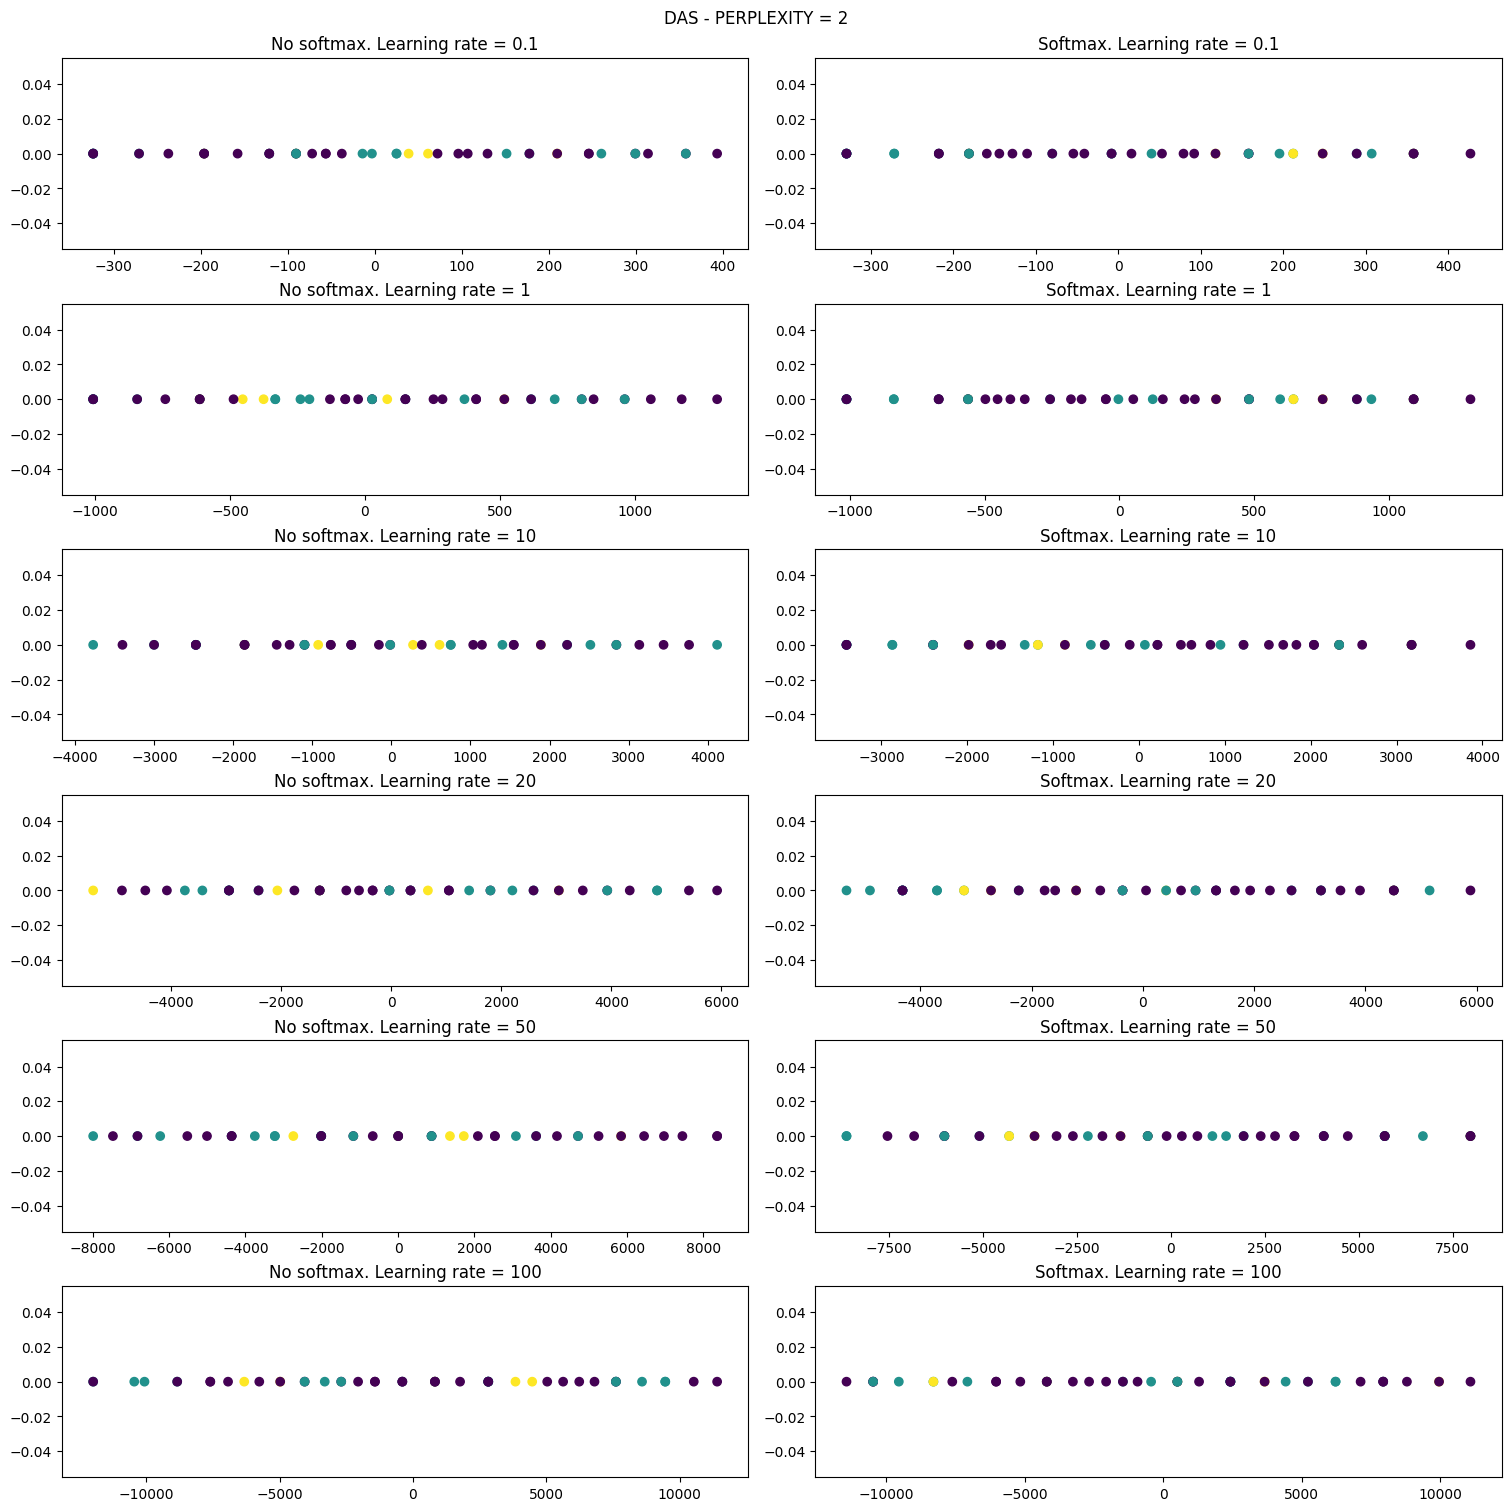

In [ ]:
# ploteamos das_pxty2 y softdas_pxty2
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty2[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty2[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 2')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 3')

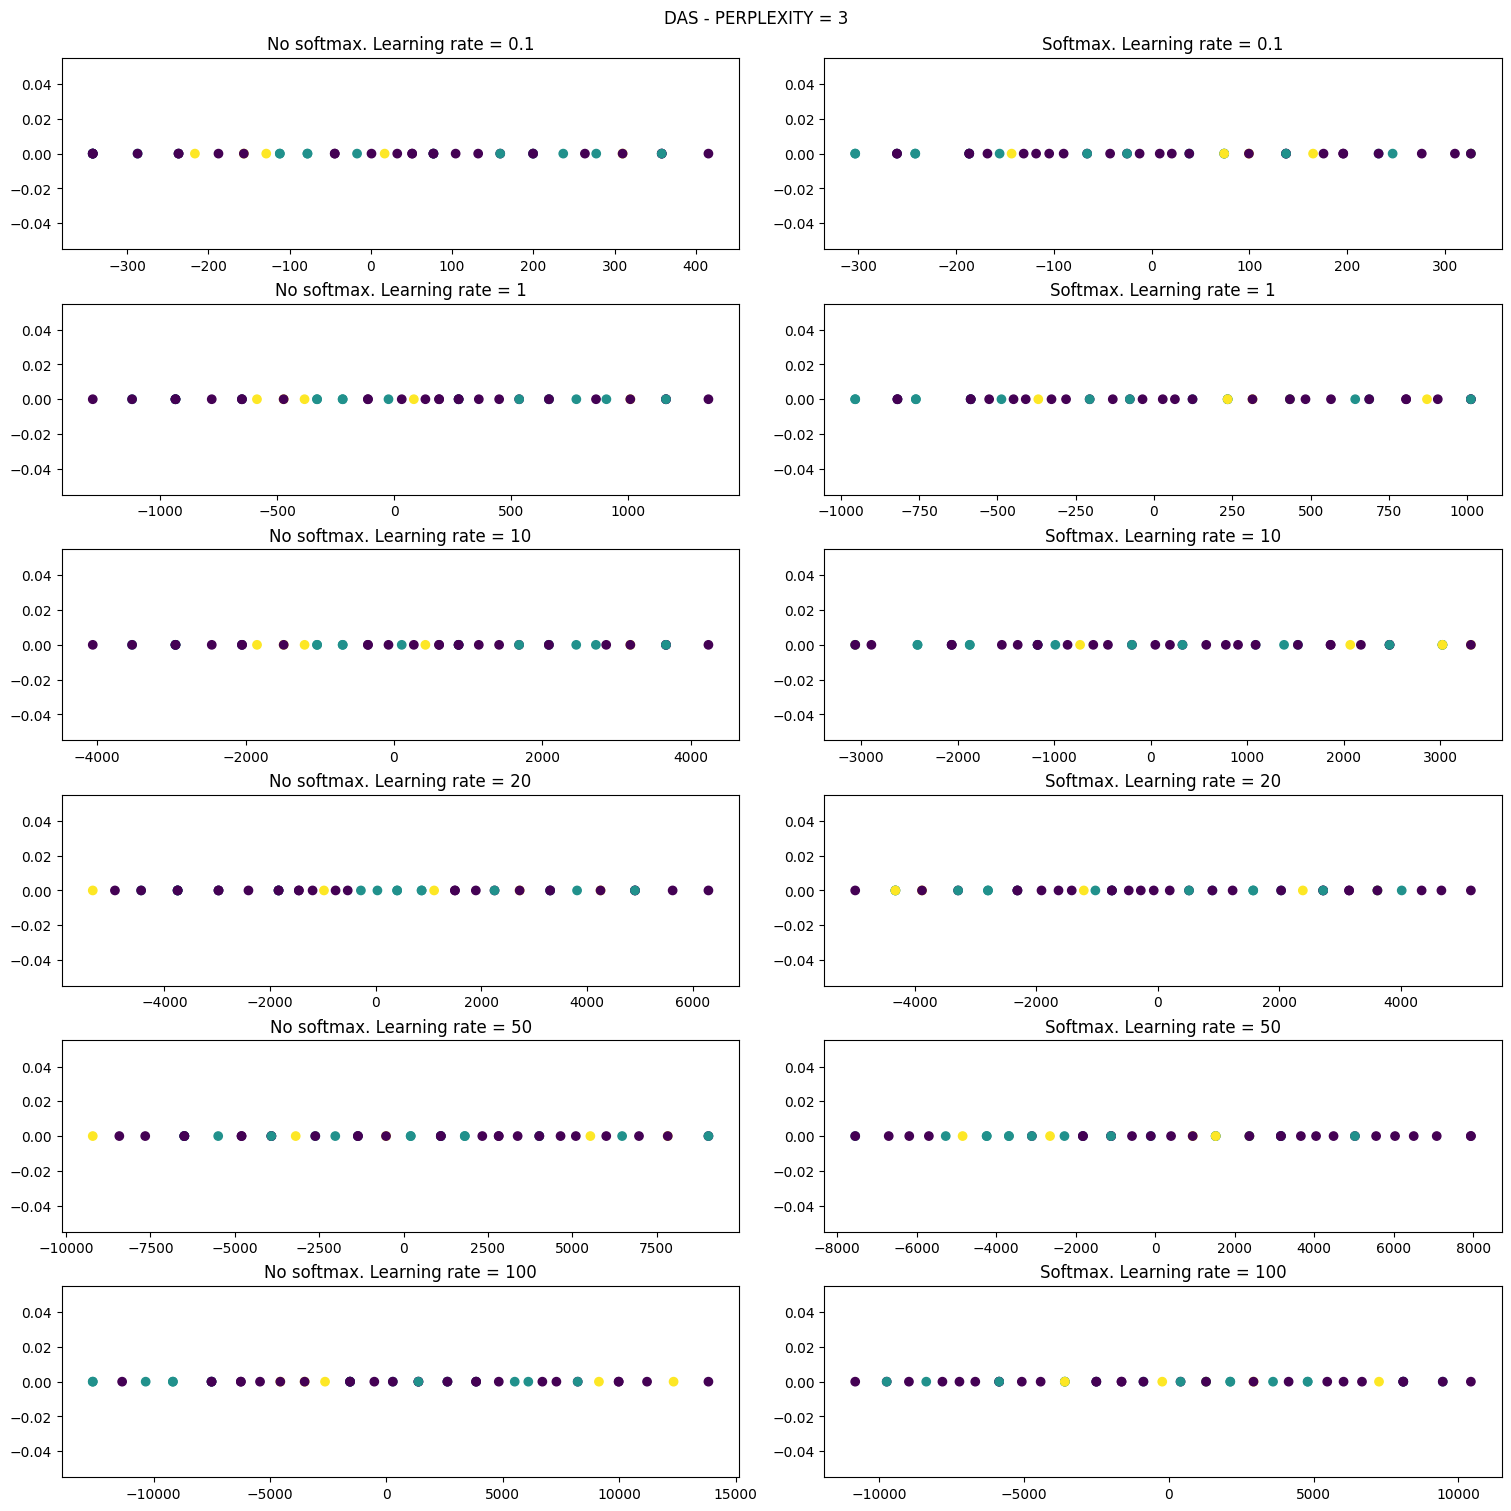

In [ ]:
# ploteamos das_pxty3 y softdas_pxty3
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty3[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty3[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 3')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 5')

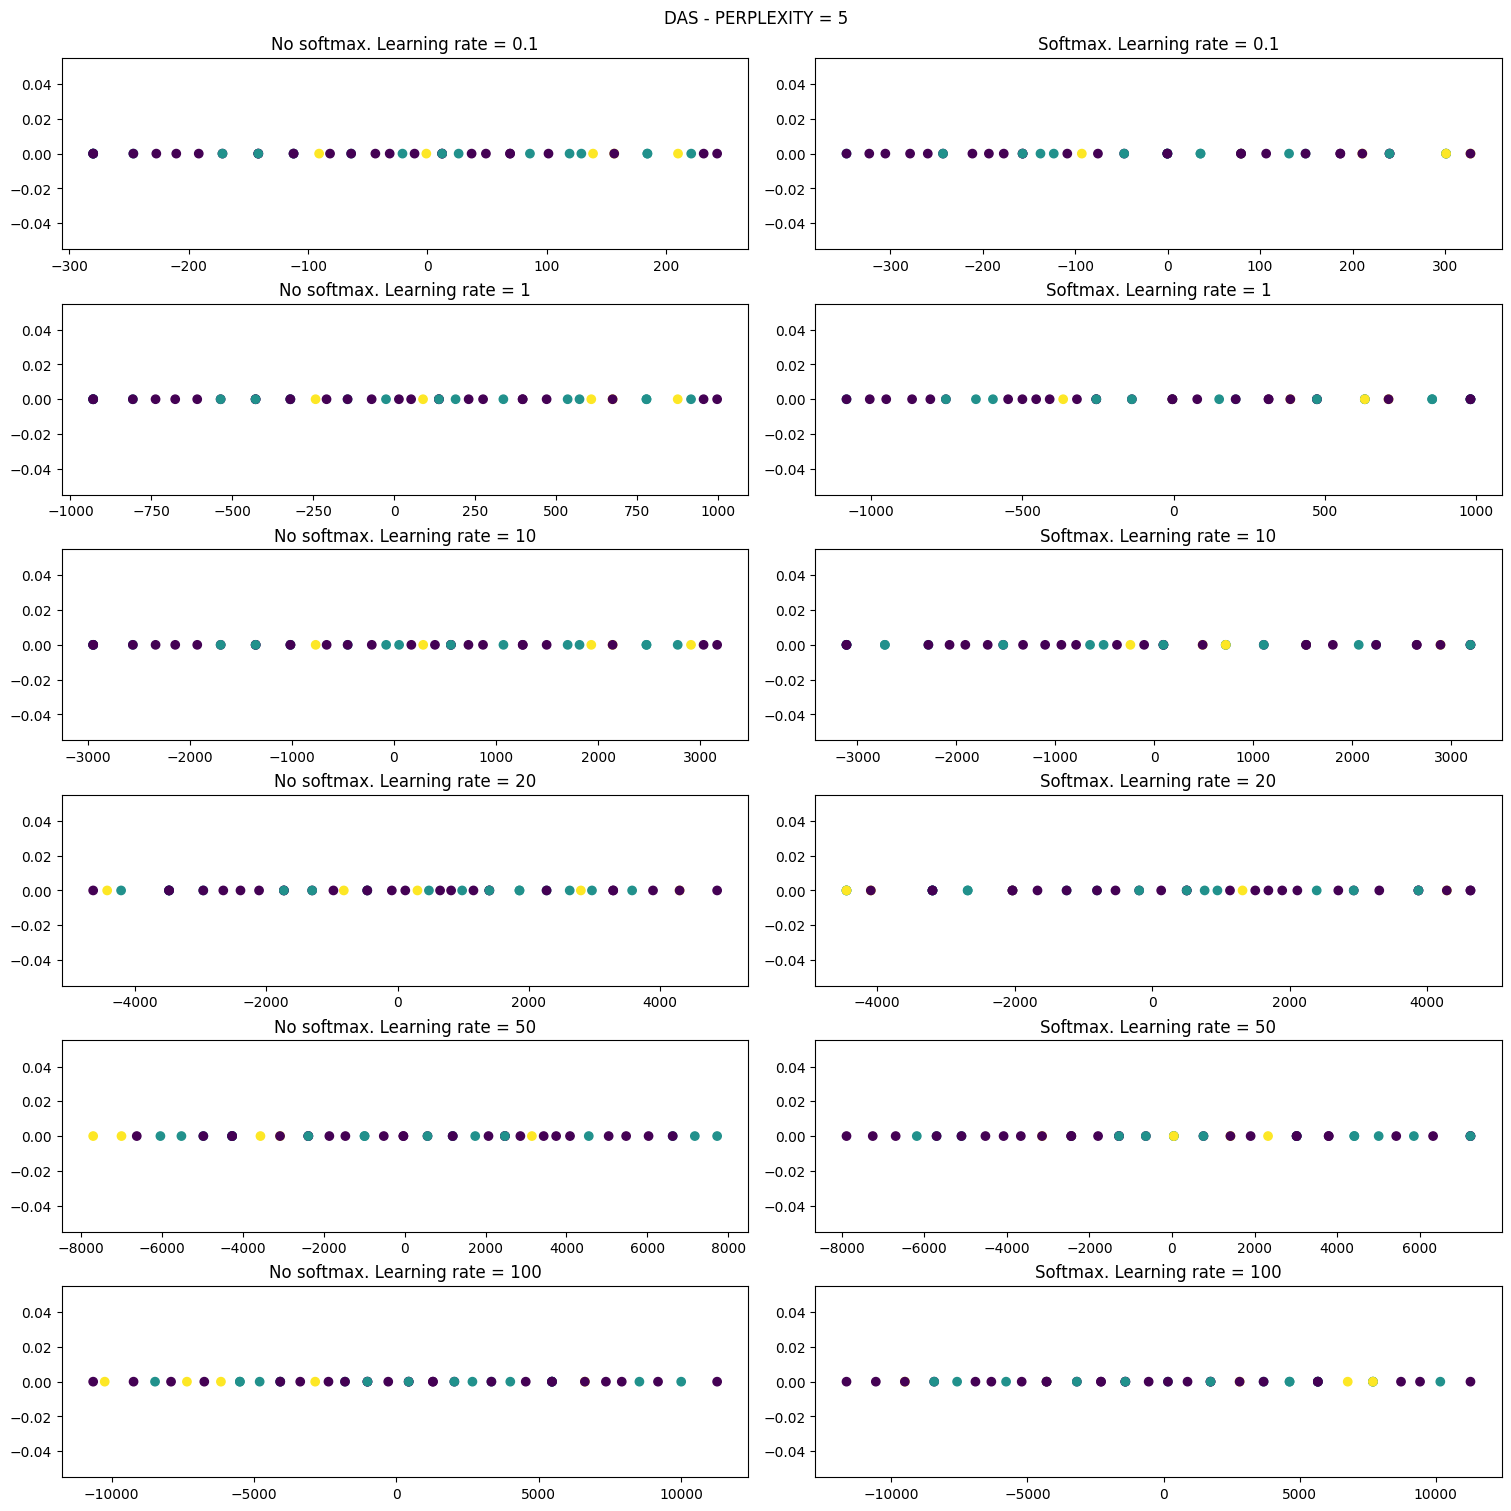

In [ ]:
# ploteamos das_pxty5 y softdas_pxty5
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty5[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty5[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 5')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 10')

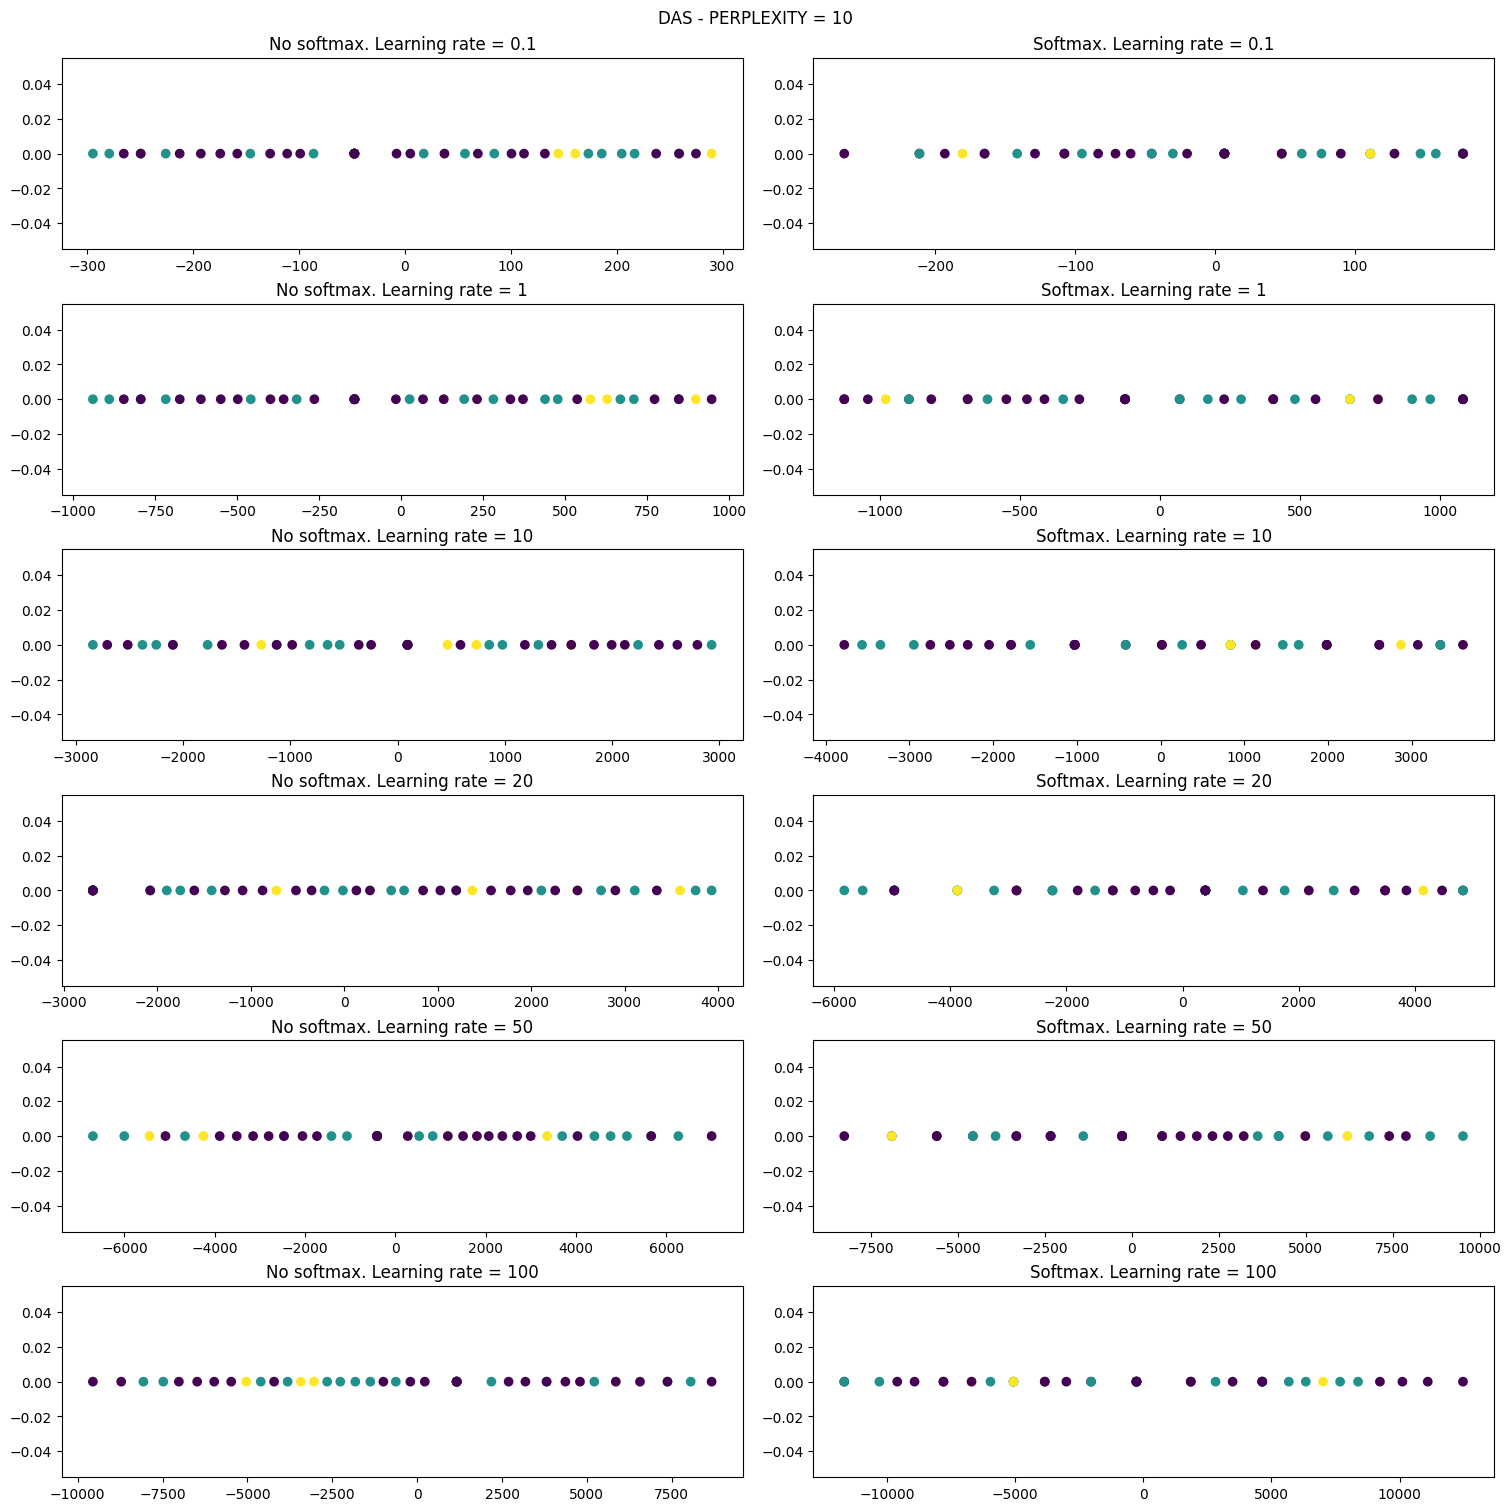

In [ ]:
# ploteamos das_pxty10 y softdas_pxty10
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty10[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty10[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 10')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 20')

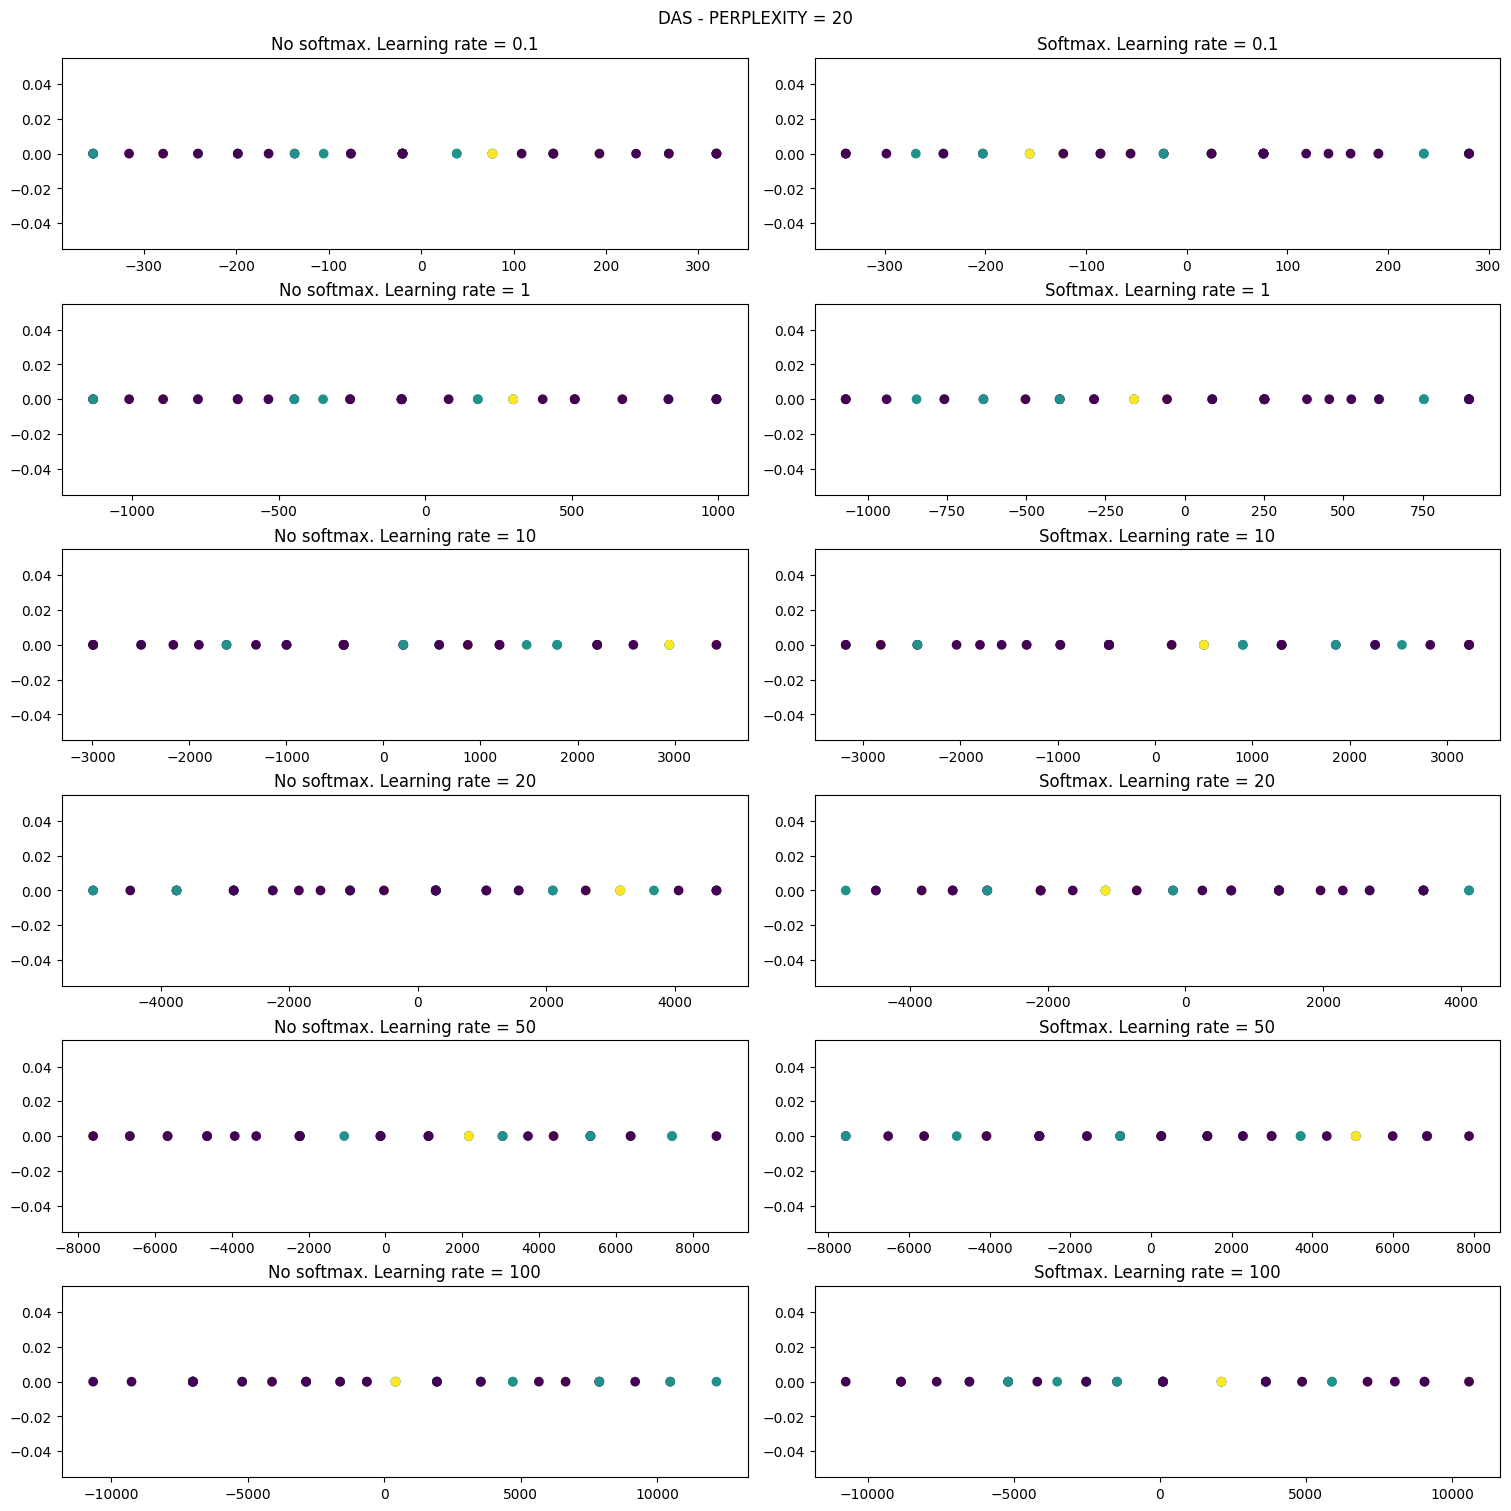

In [ ]:
# ploteamos das_pxty20 y softdas_pxty20
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty20[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty20[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 20')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 30')

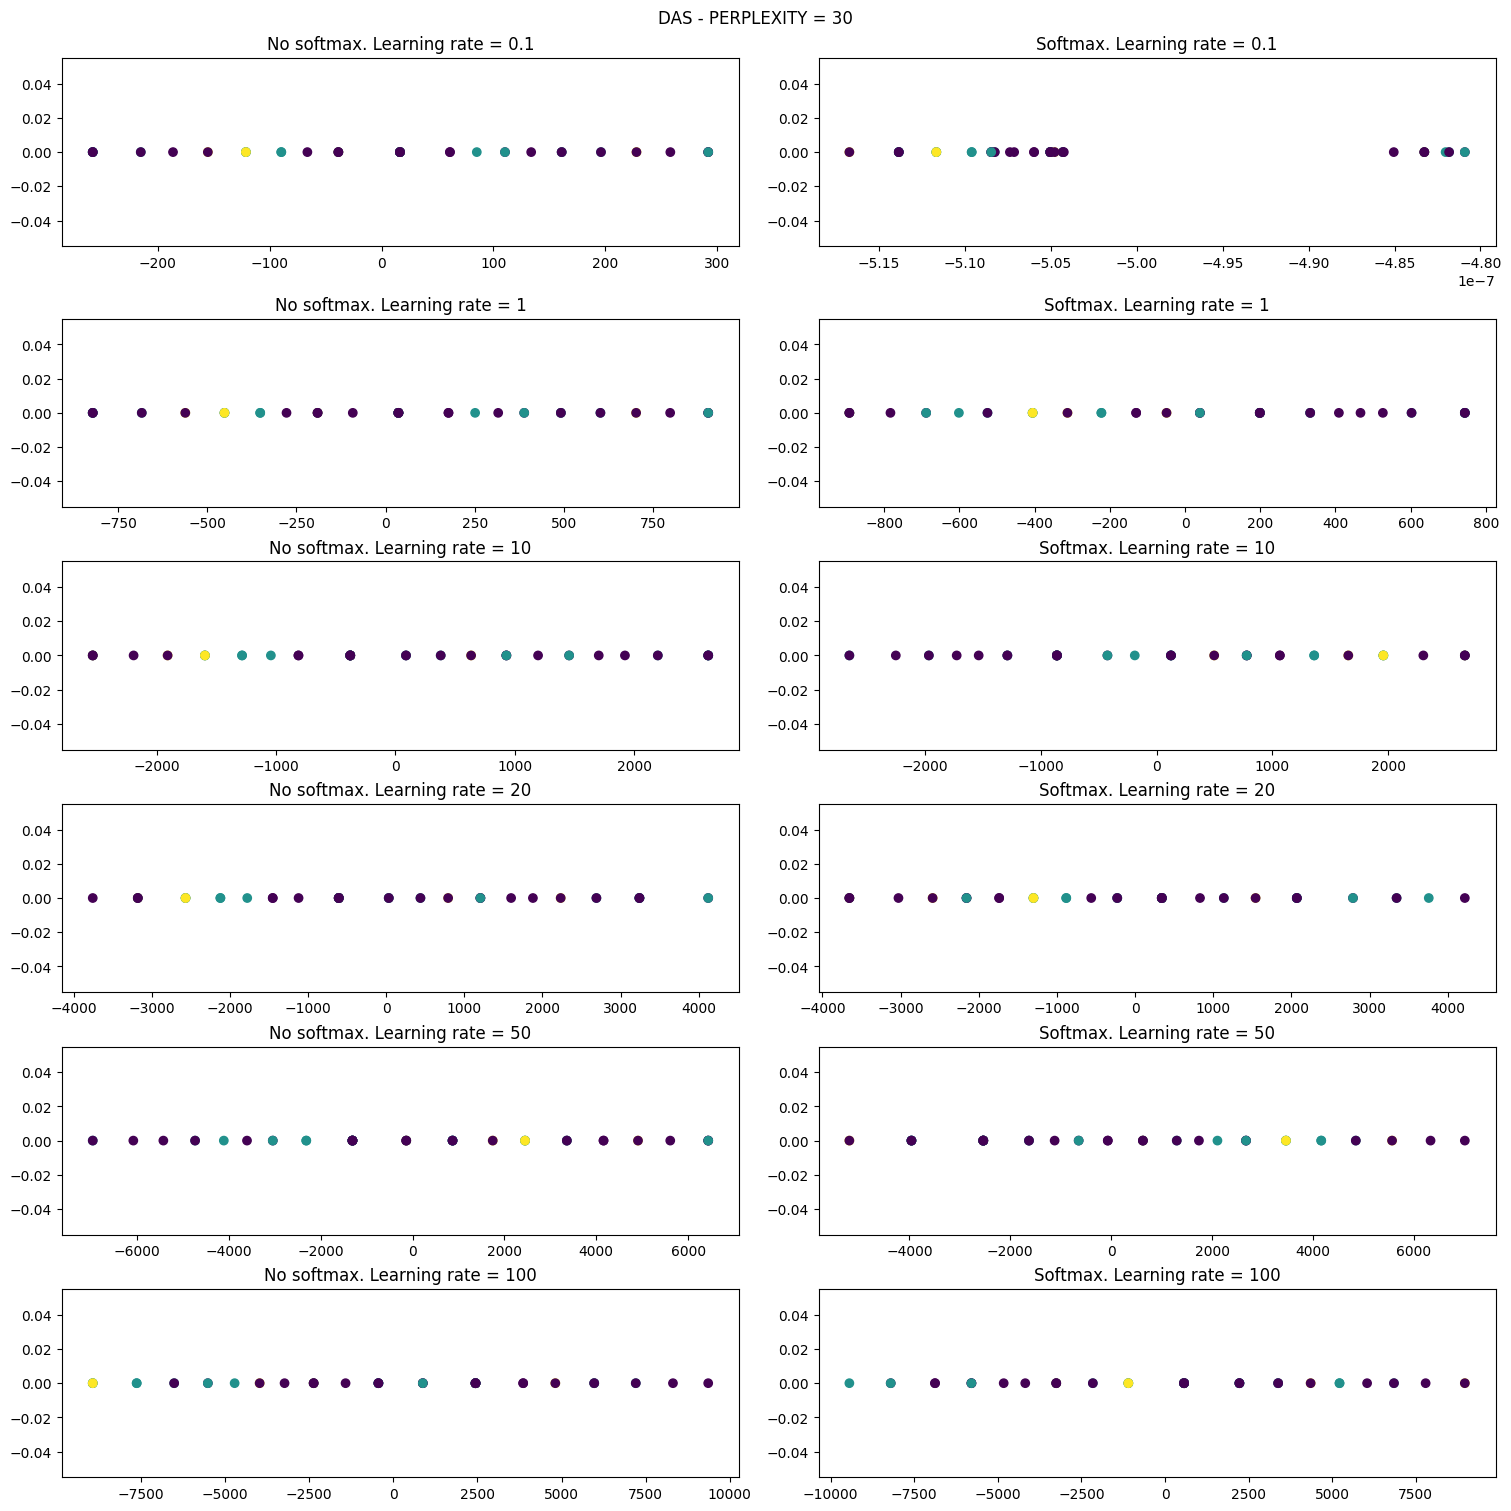

In [ ]:
# ploteamos das_pxty30 y softdas_pxty30
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty30[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty30[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 30')

Text(0.5, 0.98, 'DAS - PERPLEXITY = 40')

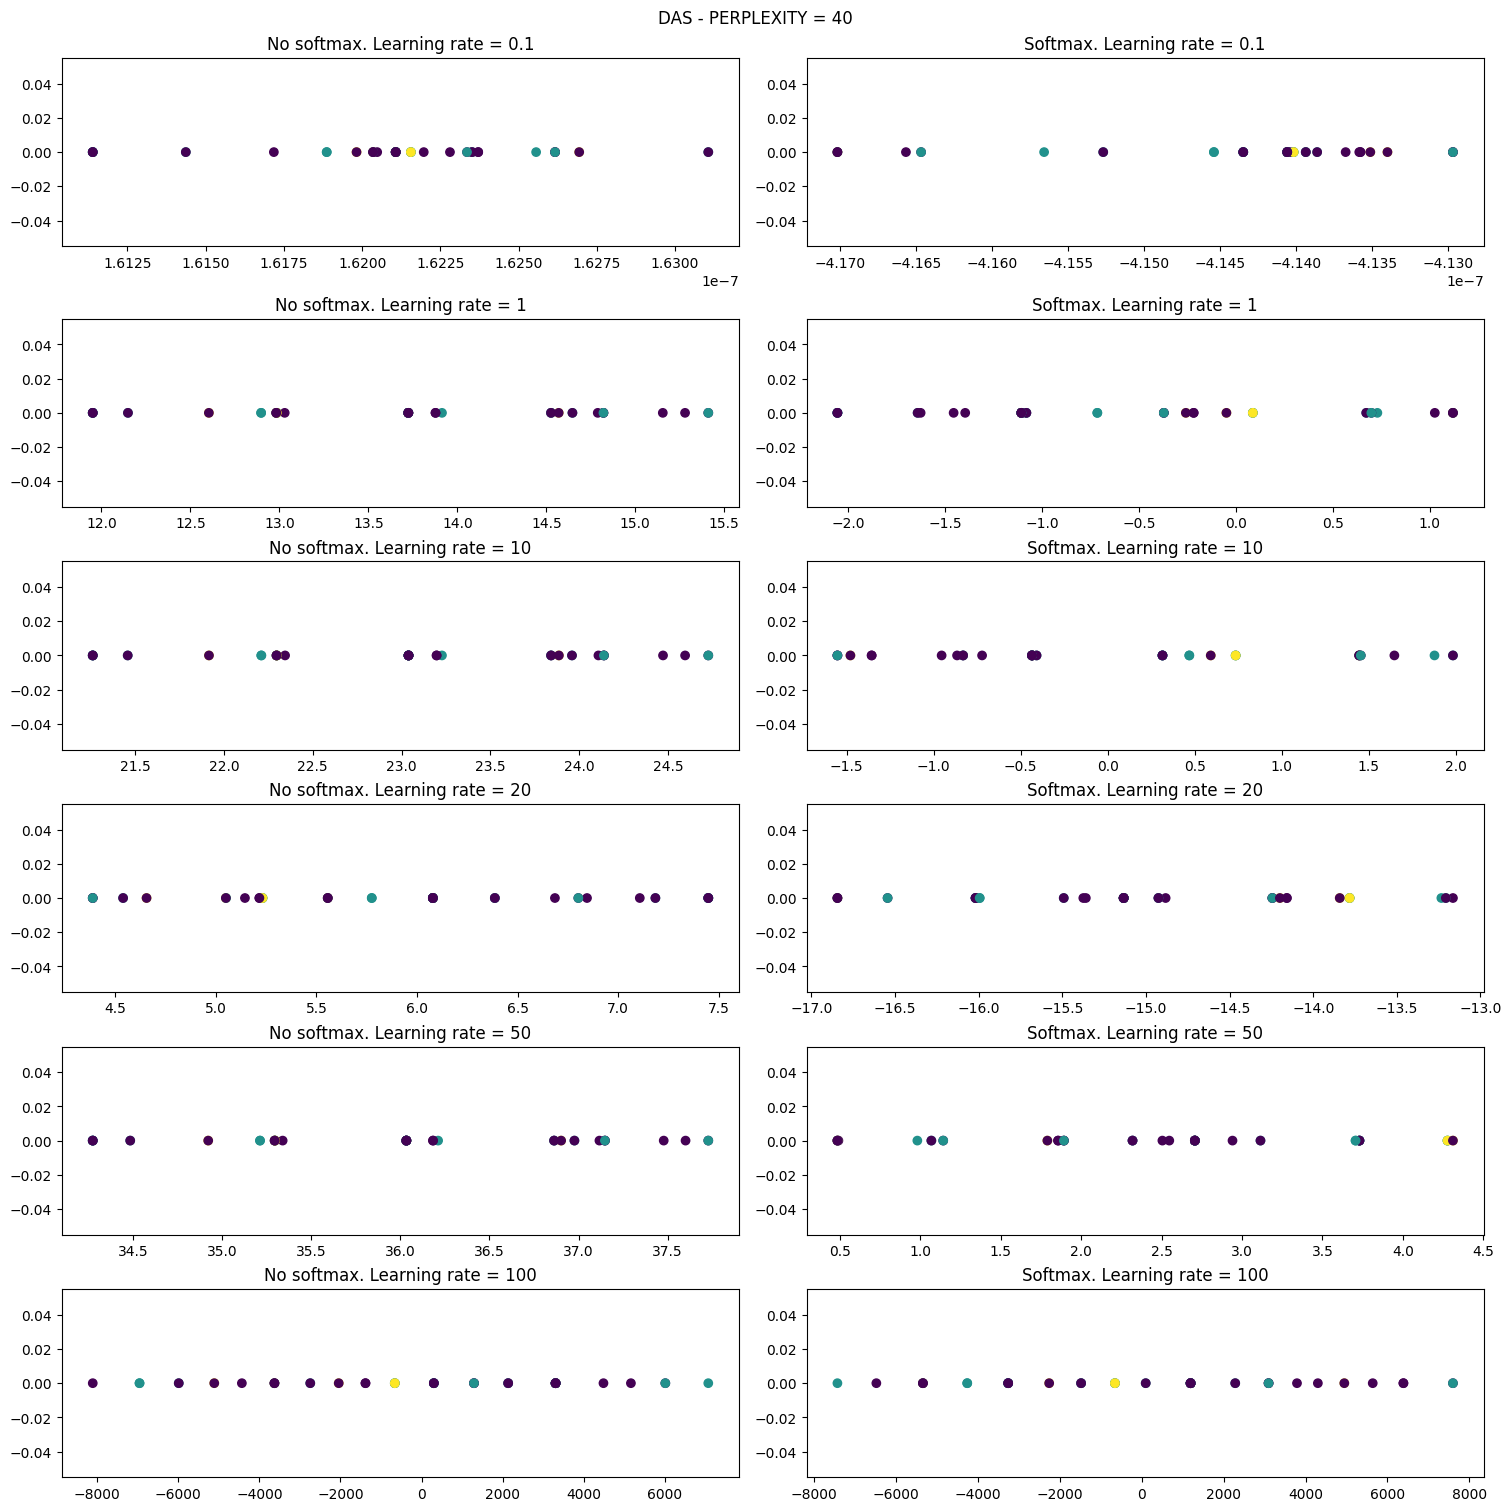

In [ ]:
# ploteamos das_pxty40 y softdas_pxty40
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softdas_pxty40[int(x/2 - 0.5)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(das_pxty40[int(x/2)]),das_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('DAS - PERPLEXITY = 40')

# Reduciendo dimensiones de perfiles de aprendizaje

In [ ]:
# aislamos los datos
perf = datos[:,3:7]

# softperf
perf[:,0]=perf[:,0].astype(float)
perf[:,1]=perf[:,1].astype(float)
perf[:,2]=perf[:,2].astype(float)
perf[:,3]=perf[:,3].astype(float)

softperf = np.zeros([48,4])

# softperf
softperf[:,0]=softmax(perf[:,0].astype(float))
softperf[:,1]=softmax(perf[:,1].astype(float))
softperf[:,2]=softmax(perf[:,2].astype(float))
softperf[:,3]=softmax(perf[:,3].astype(float))

# evaluaremos el desempeño de tsne y softmax para reducir dimensiones
# vamos a iterar...
# perplexity con valores de 2,3,5,10,20,30,40
# learning rate con valores de 0.1,1,10,20,50,100
lr=[0.1,1,10,20,50,100]
# creamos las variables para guardar las iteraciones del GridSearch
# sin softmax previo
perf_pxty2=[[],[],[],[],[],[]]
perf_pxty3=[[],[],[],[],[],[]]
perf_pxty5=[[],[],[],[],[],[]]
perf_pxty10=[[],[],[],[],[],[]]
perf_pxty20=[[],[],[],[],[],[]]
perf_pxty30=[[],[],[],[],[],[]]
perf_pxty40=[[],[],[],[],[],[]]
# con softmax previo
softperf_pxty2=[[],[],[],[],[],[]]
softperf_pxty3=[[],[],[],[],[],[]]
softperf_pxty5=[[],[],[],[],[],[]]
softperf_pxty10=[[],[],[],[],[],[]]
softperf_pxty20=[[],[],[],[],[],[]]
softperf_pxty30=[[],[],[],[],[],[]]
softperf_pxty40=[[],[],[],[],[],[]]
# evaluaremos con qué valor obtenemos mejor desempeño
# reduciremos de 3 a 1 dimensiones

# establecemos estos hiperparámetros fijos
n_iter=5000
n_iter_without_progress=500
n_jobs=100

# ciclo for donde se ejecuta el gridsearch
for i,x in enumerate(lr):
  # sin softmax previo
  perf_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  perf_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(perf)
  # con softmax previo
  softperf_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)
  softperf_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softperf)

In [ ]:
# creamos un dummy para plotear
perf_y_dummy=np.zeros(np.shape(np.ravel(perf_pxty5[0])))

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 2')

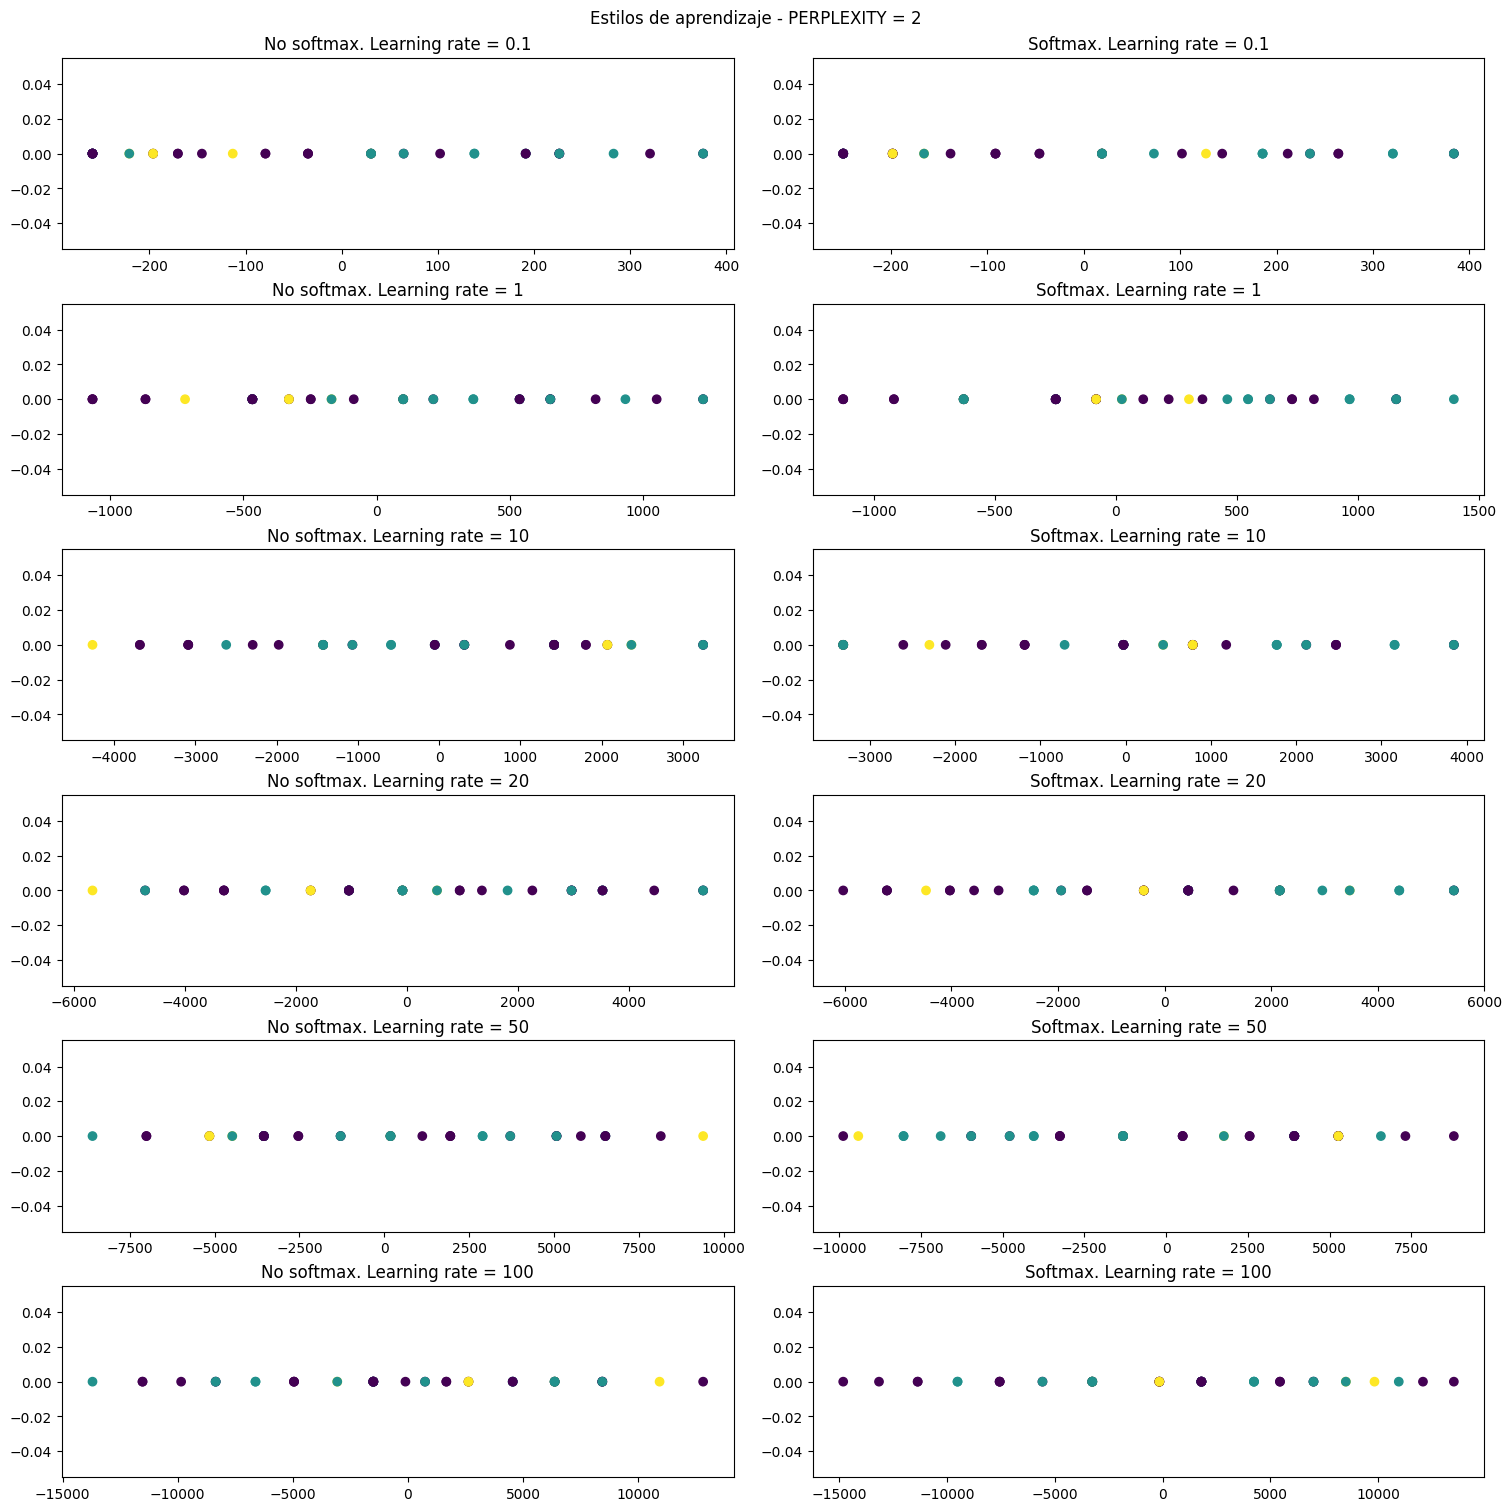

In [ ]:
# ploteamos perf_pxty2 y softperf_pxty2
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty2[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty2[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 2')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 3')

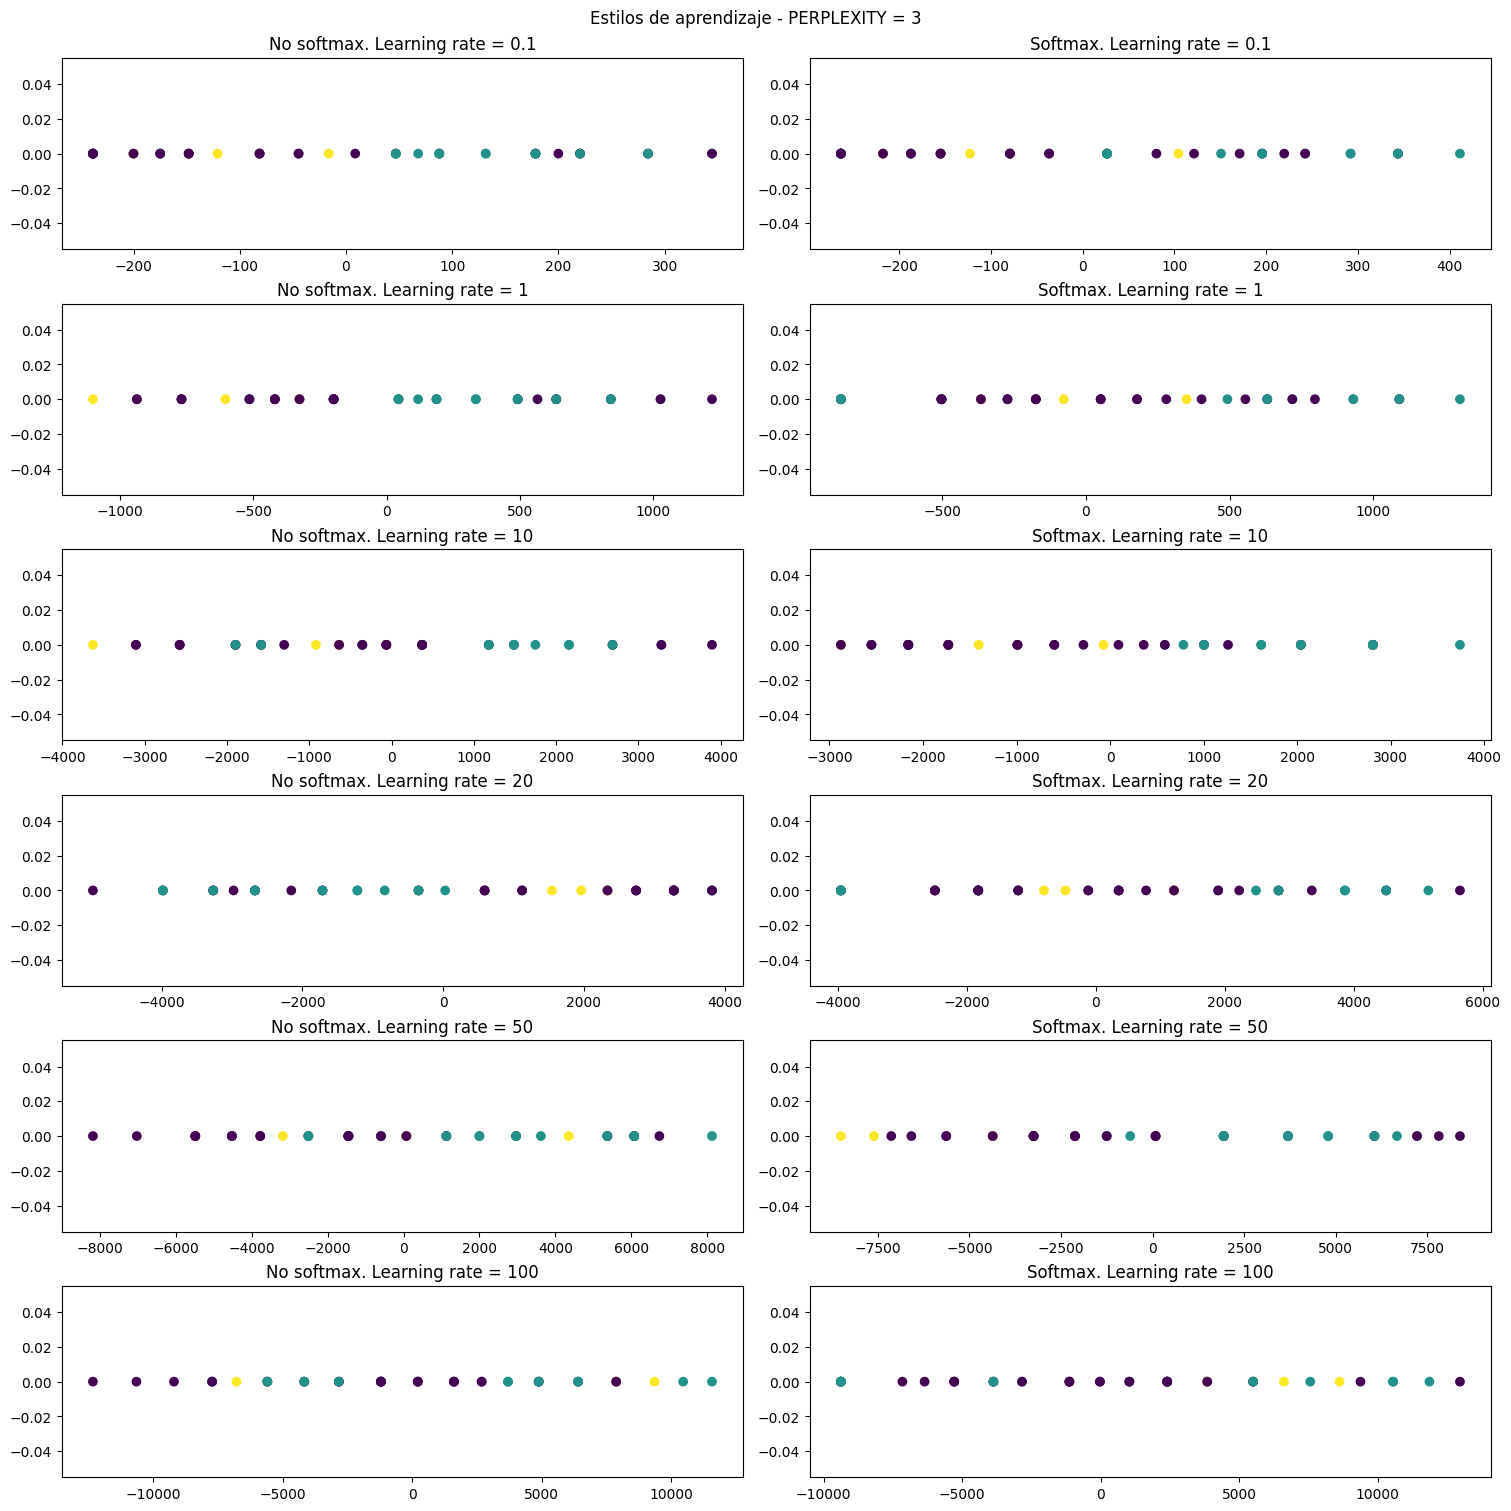

In [ ]:
# ploteamos perf_pxty3 y softperf_pxty3
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty3[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty3[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 3')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 5')

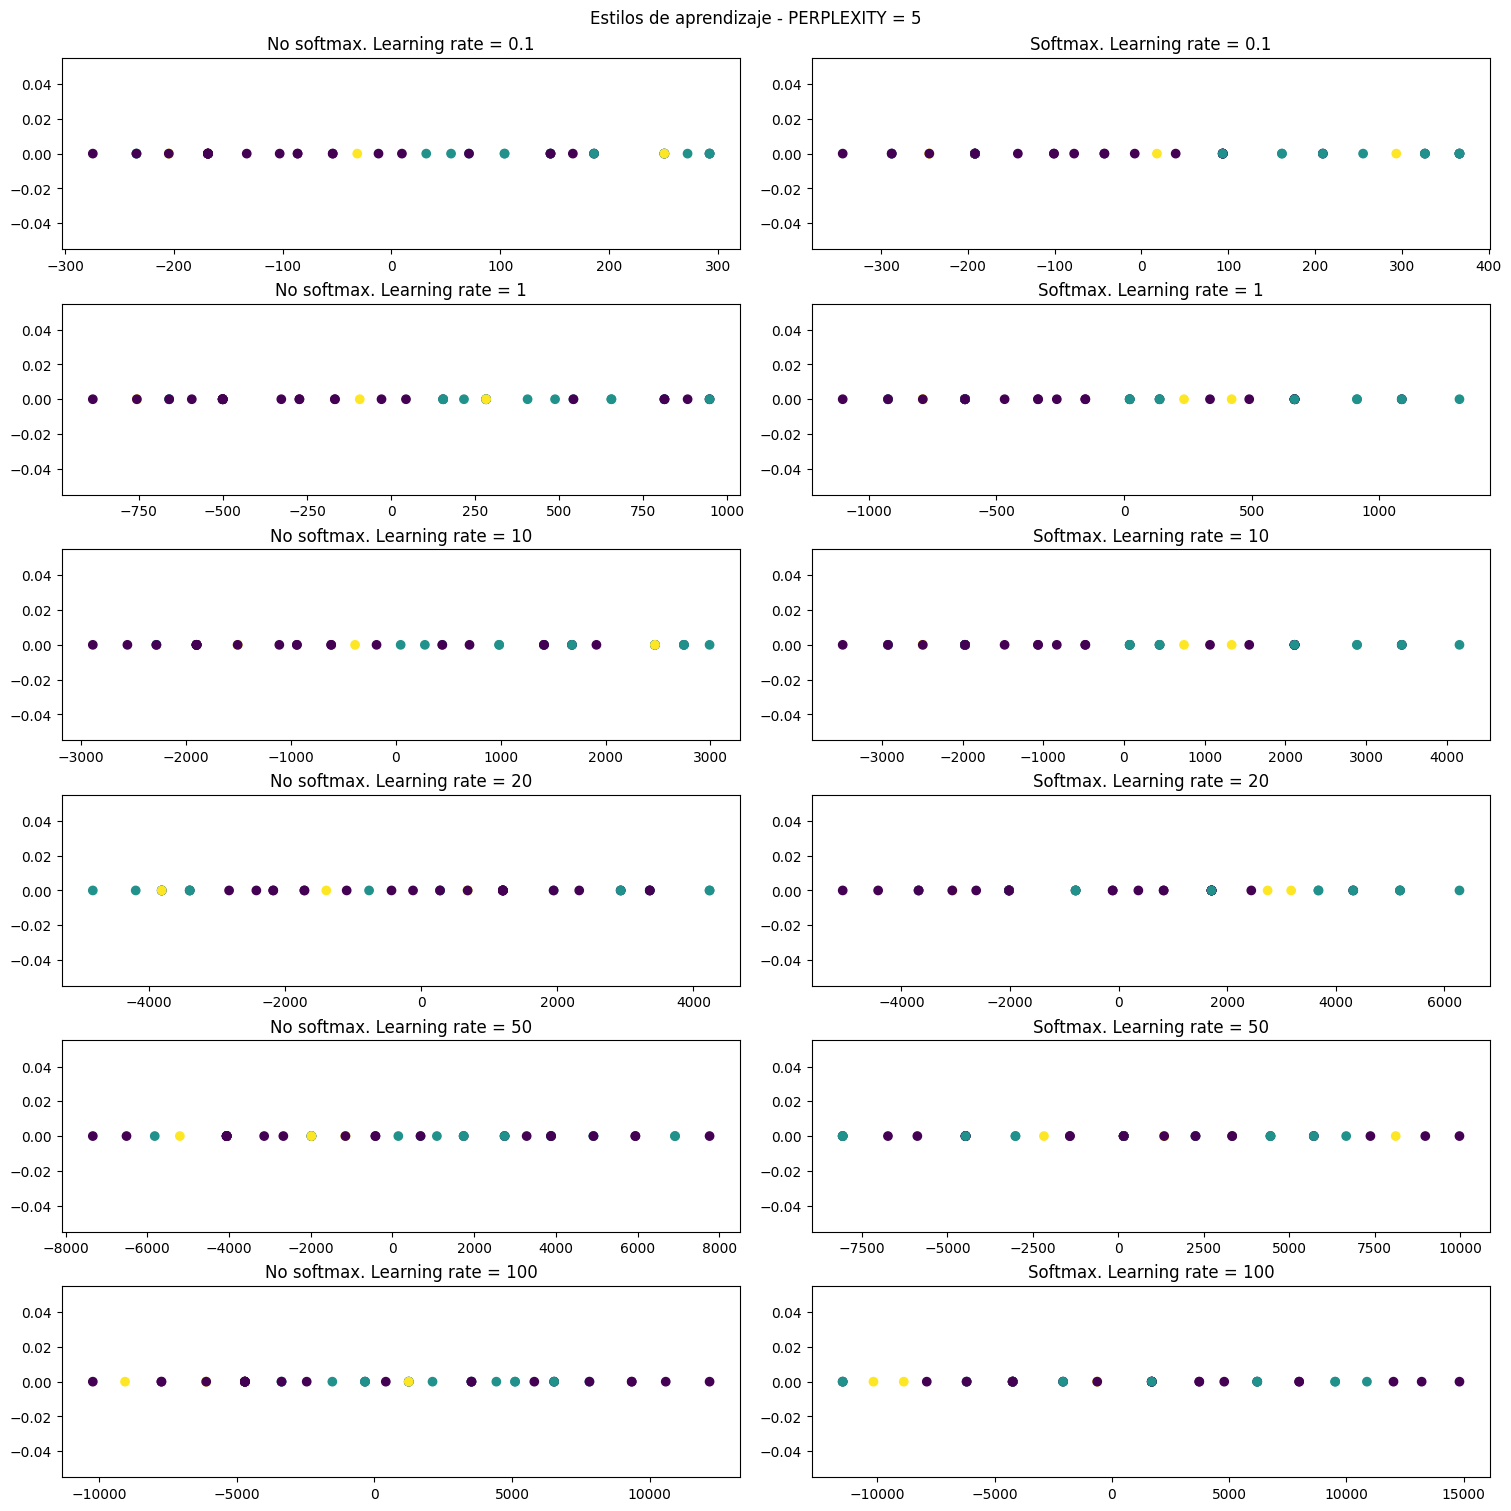

In [ ]:
# ploteamos perf_pxty5 y softperf_pxty5
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty5[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty5[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 5')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 10')

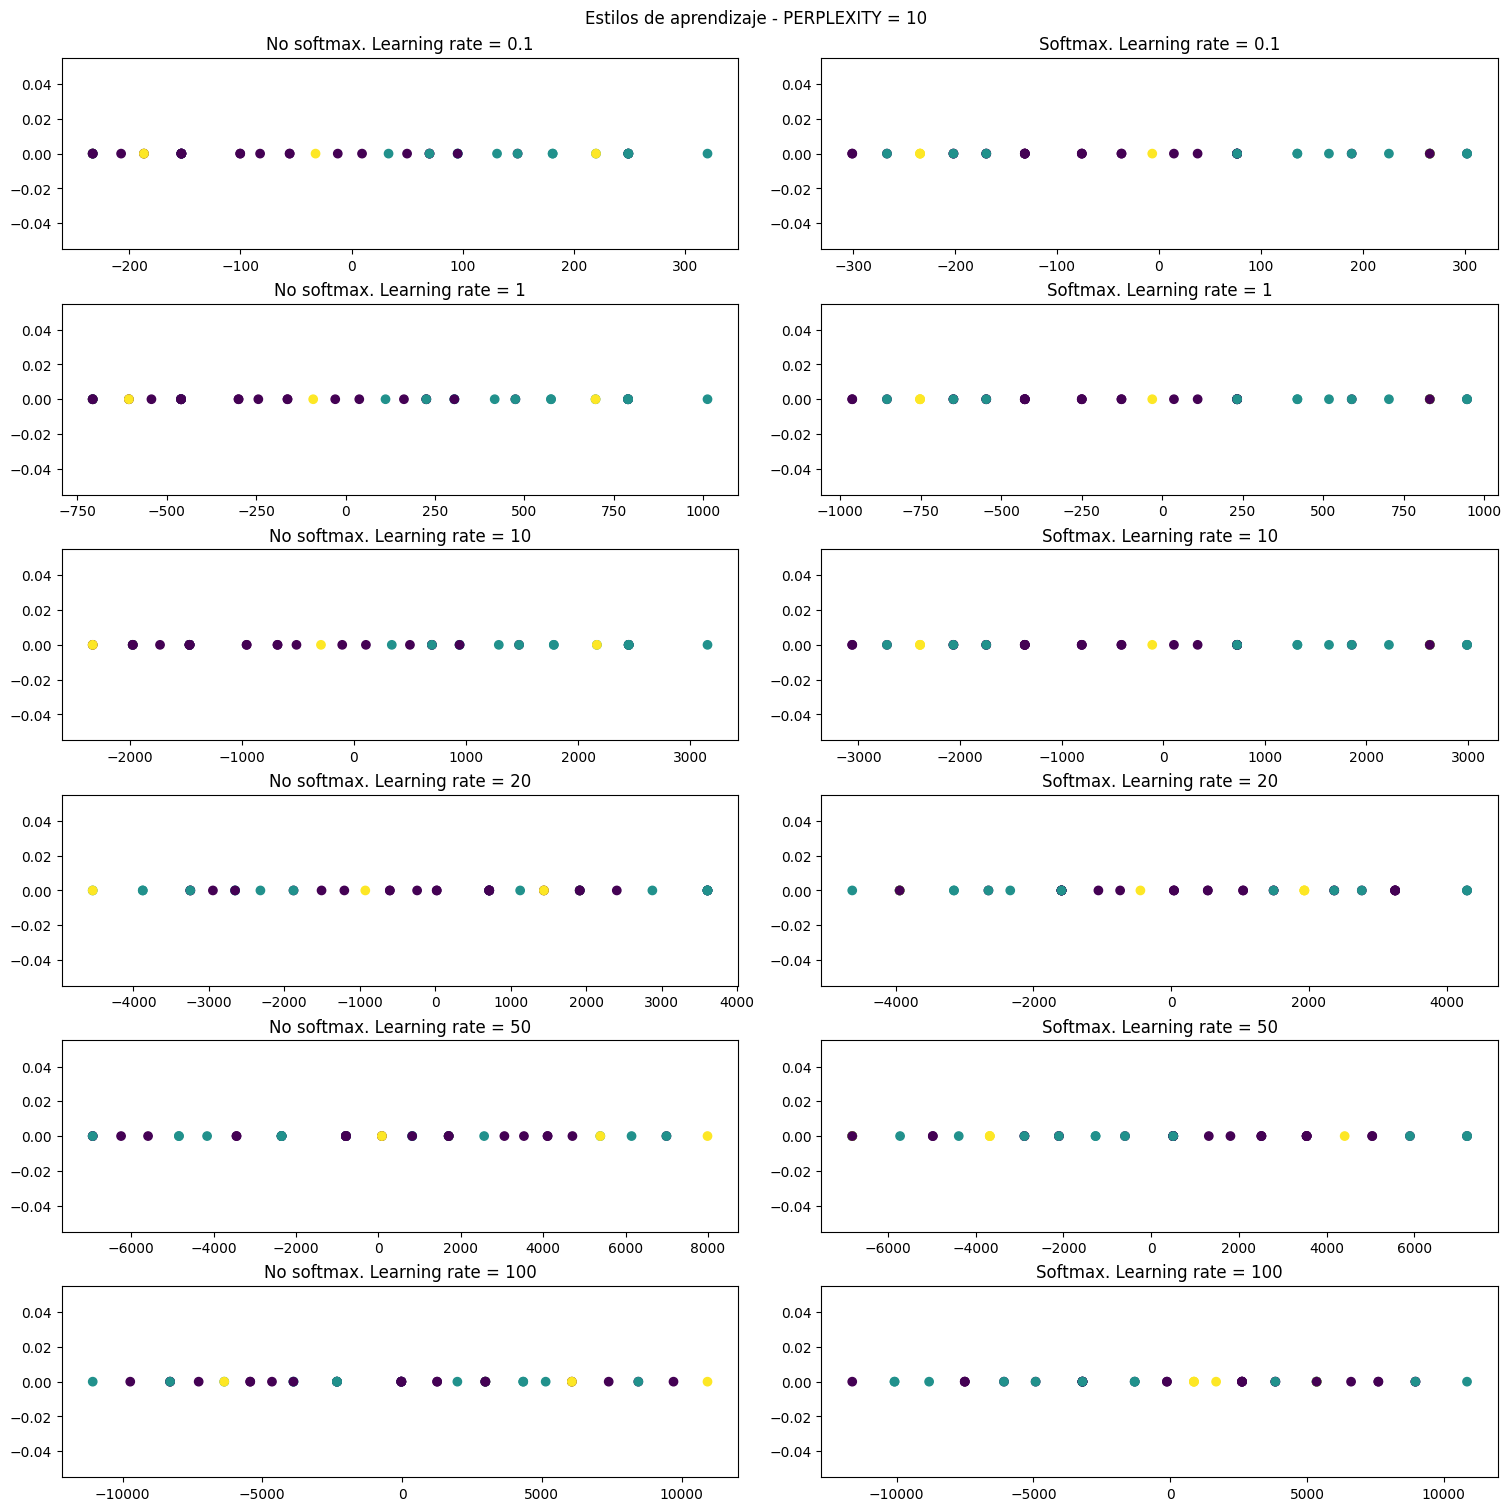

In [ ]:
# ploteamos perf_pxty10 y softperf_pxty10
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty10[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty10[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 10')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 20')

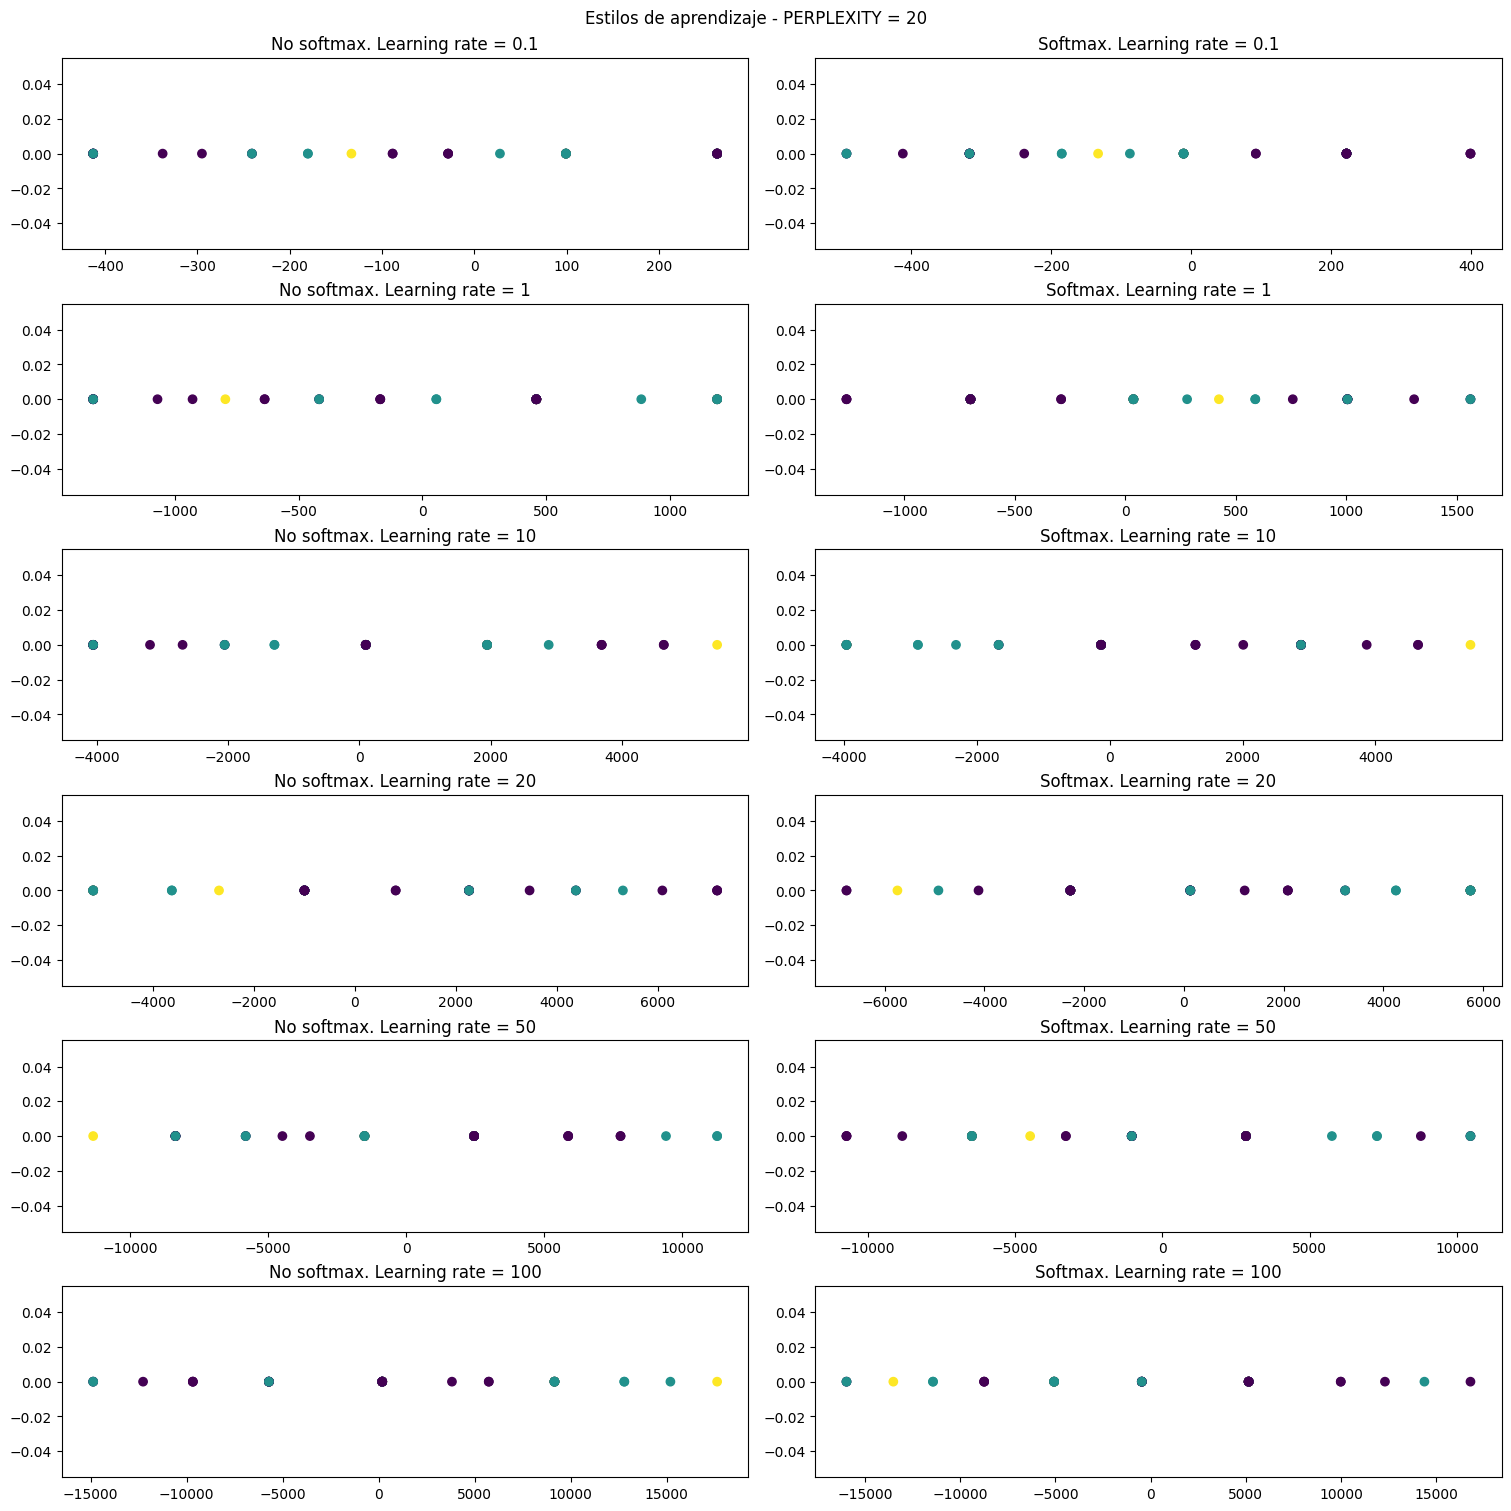

In [ ]:
# ploteamos perf_pxty20 y softperf_pxty20
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty20[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty20[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 20')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 30')

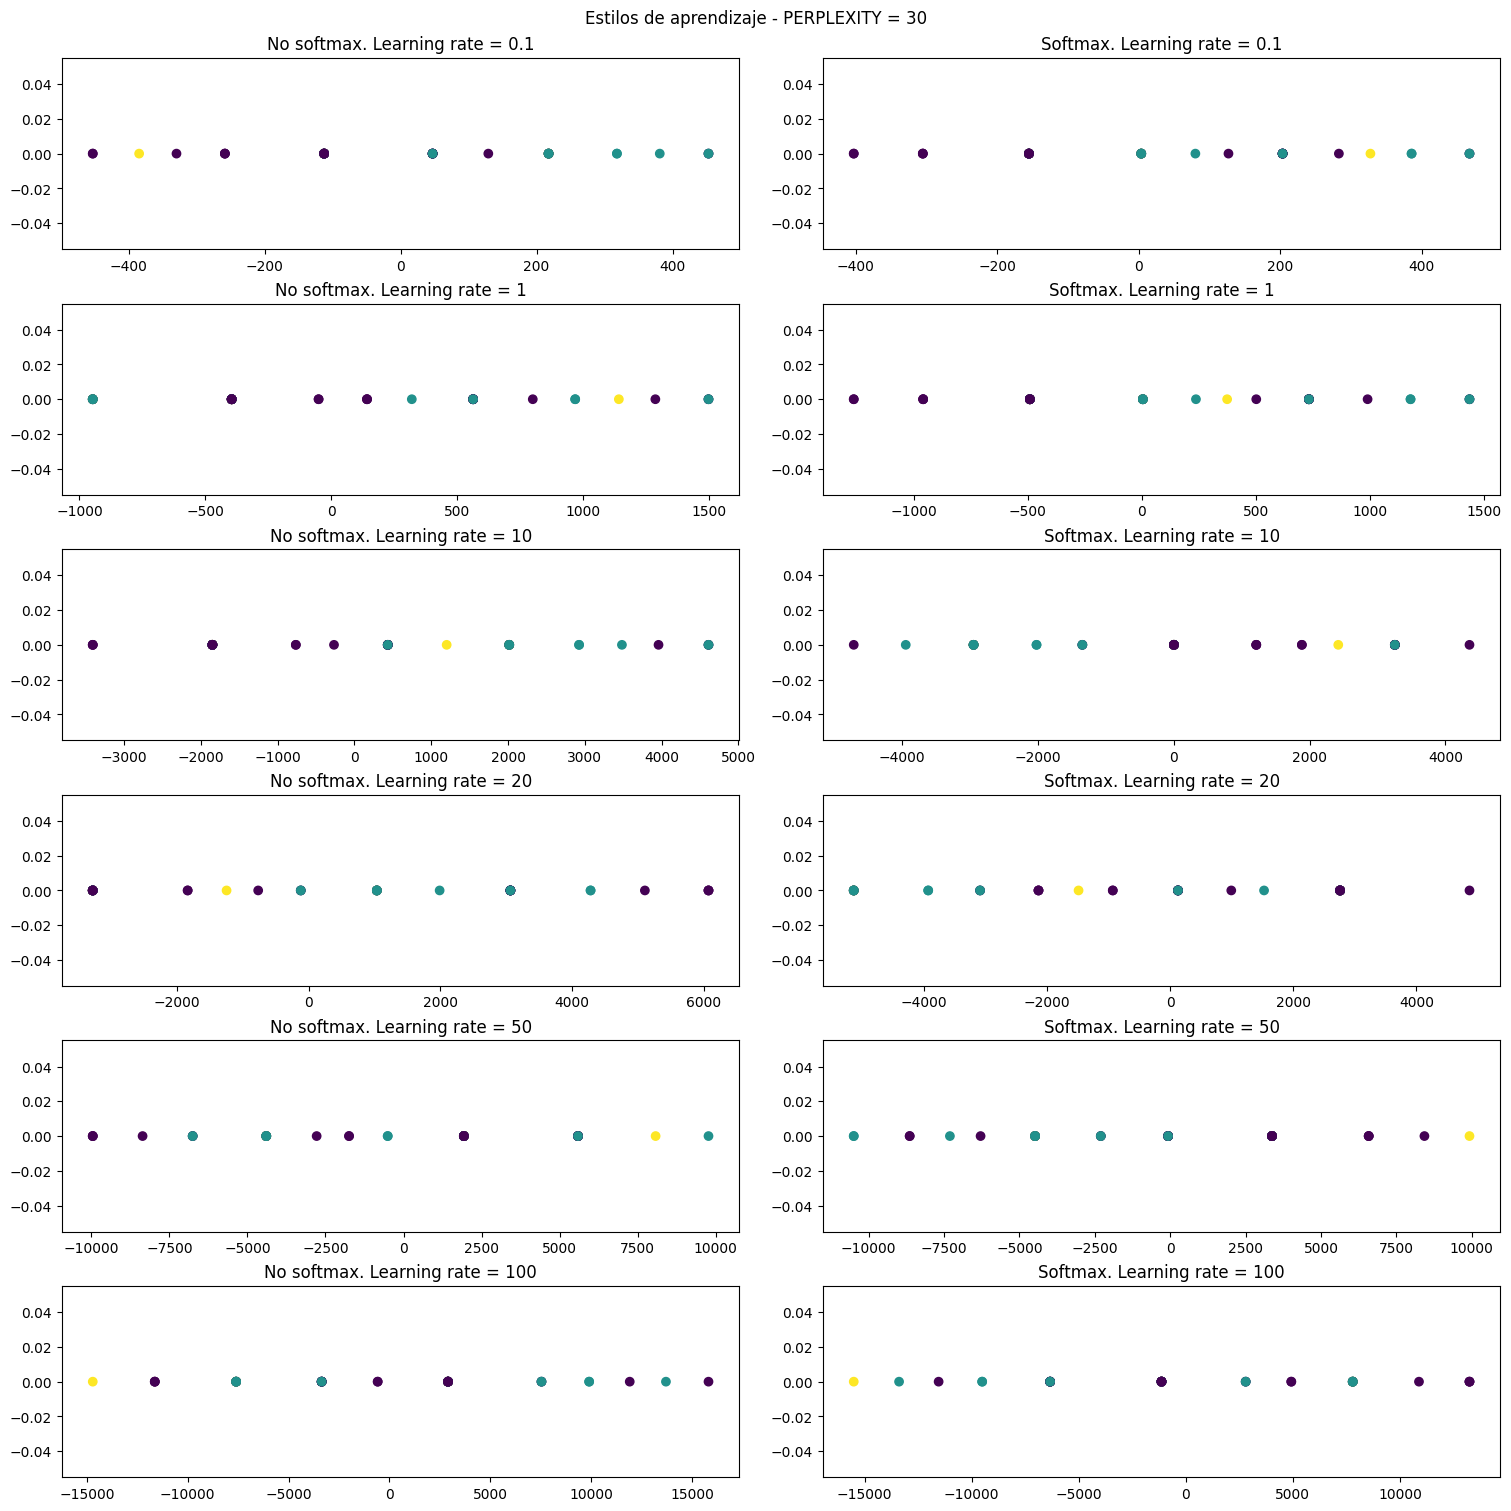

In [ ]:
# ploteamos perf_pxty30 y softperf_pxty30
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty30[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty30[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 30')

Text(0.5, 0.98, 'Estilos de aprendizaje - PERPLEXITY = 40')

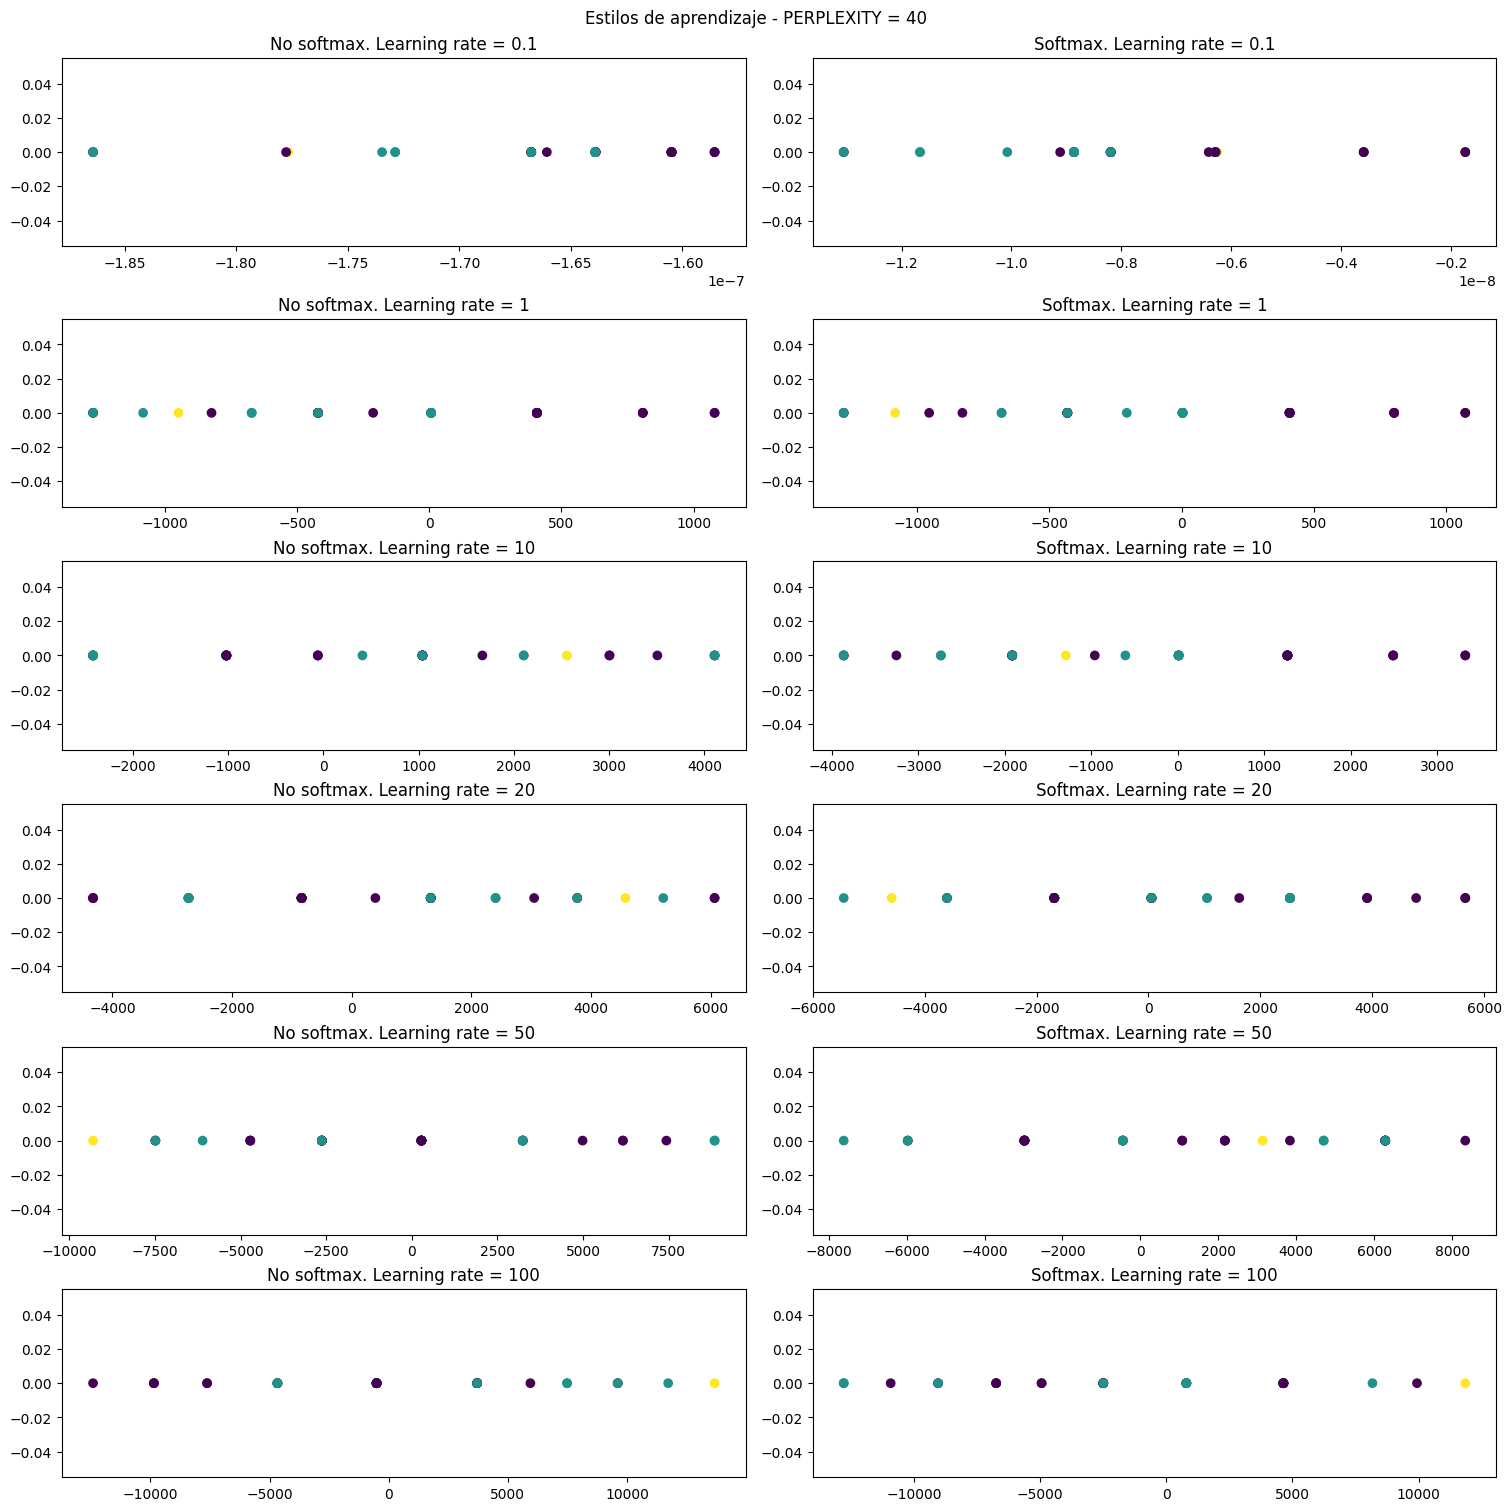

In [ ]:
# ploteamos perf_pxty40 y softperf_pxty40
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softperf_pxty40[int(x/2 - 0.5)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(perf_pxty40[int(x/2)]),perf_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('Estilos de aprendizaje - PERPLEXITY = 40')

# Ajustamos los datos del SSI y graficamos

In [ ]:
# aislamos los datos
ssi = datos[:,7]

ssi=ssi.astype(float).reshape(-1,1)

softssi=np.zeros(np.shape(ssi))

# softssi
softssi=softmax(ssi.astype(float))

# evaluaremos el desempeño de tsne y softmax para reducir dimensiones
# vamos a iterar...
# perplexity con valores de 2,3,5,10,20,30,40
# learning rate con valores de 0.1,1,10,20,50,100
lr=[0.1,1,10,20,50,100]
# creamos las variables para guardar las iteraciones del GridSearch
# sin softmax previo
ssi_pxty2=[[],[],[],[],[],[]]
ssi_pxty3=[[],[],[],[],[],[]]
ssi_pxty5=[[],[],[],[],[],[]]
ssi_pxty10=[[],[],[],[],[],[]]
ssi_pxty20=[[],[],[],[],[],[]]
ssi_pxty30=[[],[],[],[],[],[]]
ssi_pxty40=[[],[],[],[],[],[]]
# con softmax previo
softssi_pxty2=[[],[],[],[],[],[]]
softssi_pxty3=[[],[],[],[],[],[]]
softssi_pxty5=[[],[],[],[],[],[]]
softssi_pxty10=[[],[],[],[],[],[]]
softssi_pxty20=[[],[],[],[],[],[]]
softssi_pxty30=[[],[],[],[],[],[]]
softssi_pxty40=[[],[],[],[],[],[]]
# evaluaremos con qué valor obtenemos mejor desempeño
# reduciremos de 3 a 1 dimensiones

# establecemos estos hiperparámetros fijos
n_iter=5000
n_iter_without_progress=500
n_jobs=100

# ciclo for donde se ejecuta el gridsearch
for i,x in enumerate(lr):
  # sin softmax previo
  ssi_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  ssi_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(ssi)
  # con softmax previo
  softssi_pxty2[i]=TSNE(n_components=1, perplexity=2,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty3[i]=TSNE(n_components=1, perplexity=3,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty5[i]=TSNE(n_components=1, perplexity=5,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty10[i]=TSNE(n_components=1, perplexity=10,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty20[i]=TSNE(n_components=1, perplexity=20,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty30[i]=TSNE(n_components=1, perplexity=30,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)
  softssi_pxty40[i]=TSNE(n_components=1, perplexity=40,n_iter=n_iter,n_iter_without_progress=n_iter_without_progress,learning_rate=x,n_jobs=n_jobs).fit_transform(softssi)

In [ ]:
# creamos un dummy para plotear
ssi_y_dummy=np.zeros(np.shape(np.ravel(ssi_pxty5[0])))

Text(0.5, 0.98, 'SSI - PERPLEXITY = 2')

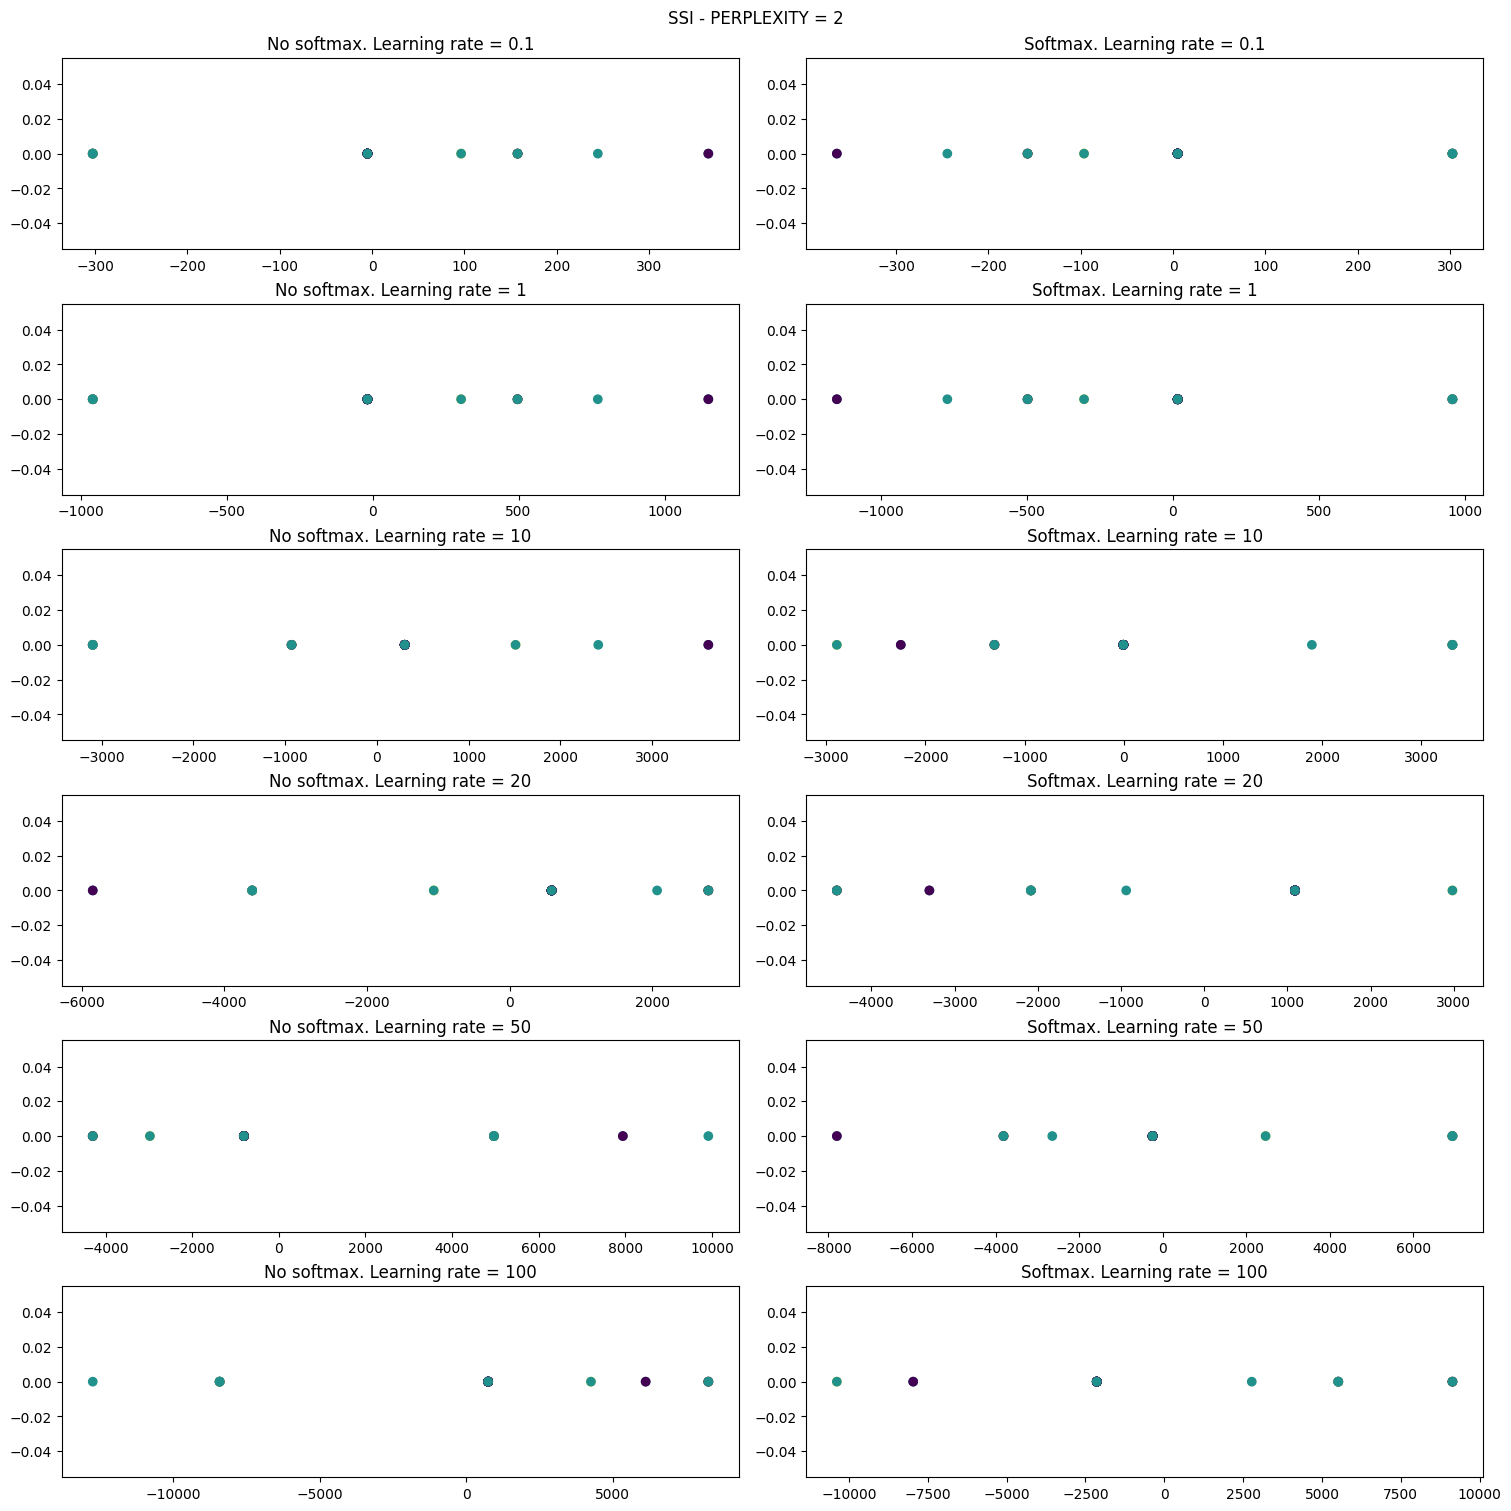

In [ ]:
# ploteamos ssi_pxty2 y softssi_pxty2
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty2[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty2[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 2')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 3')

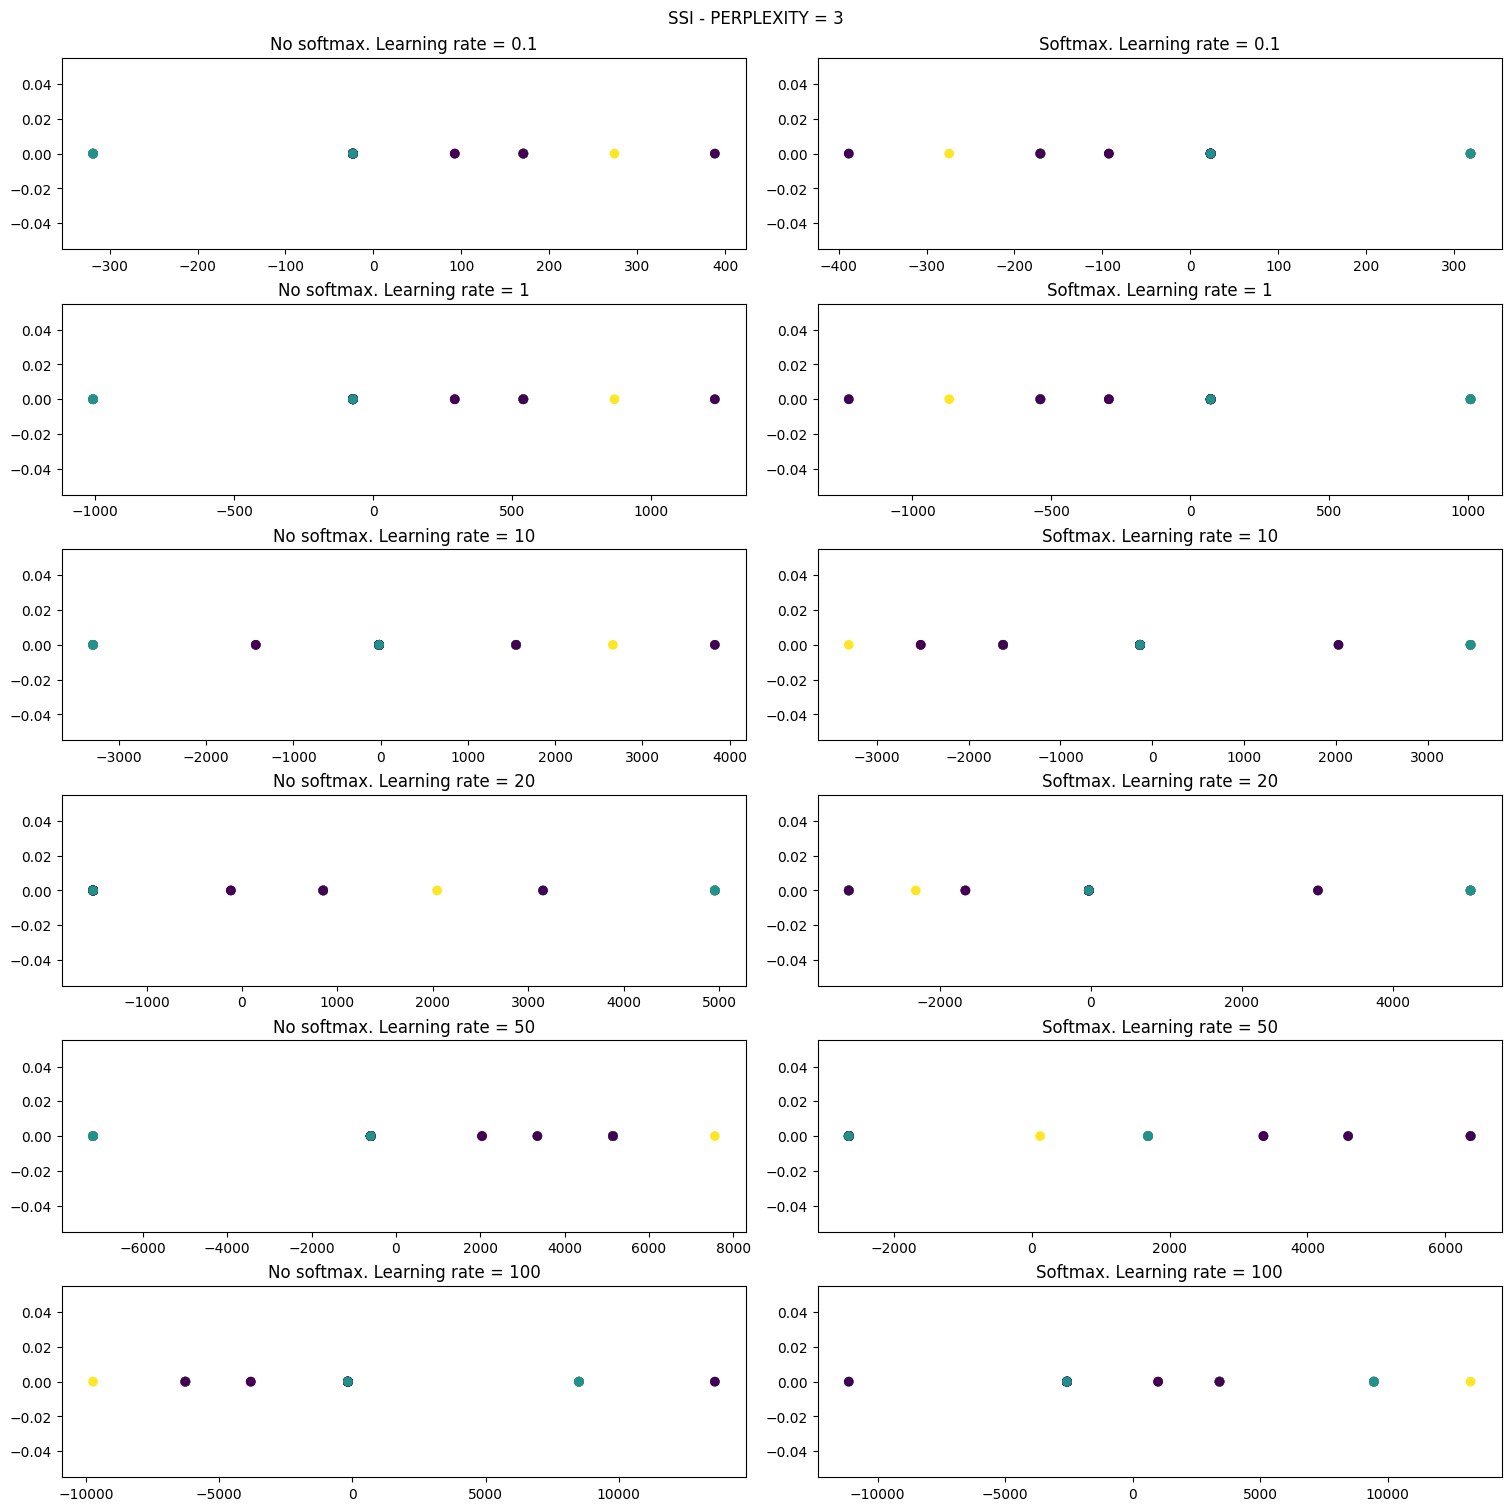

In [ ]:
# ploteamos ssi_pxty3 y softssi_pxty3
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty3[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty3[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 3')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 5')

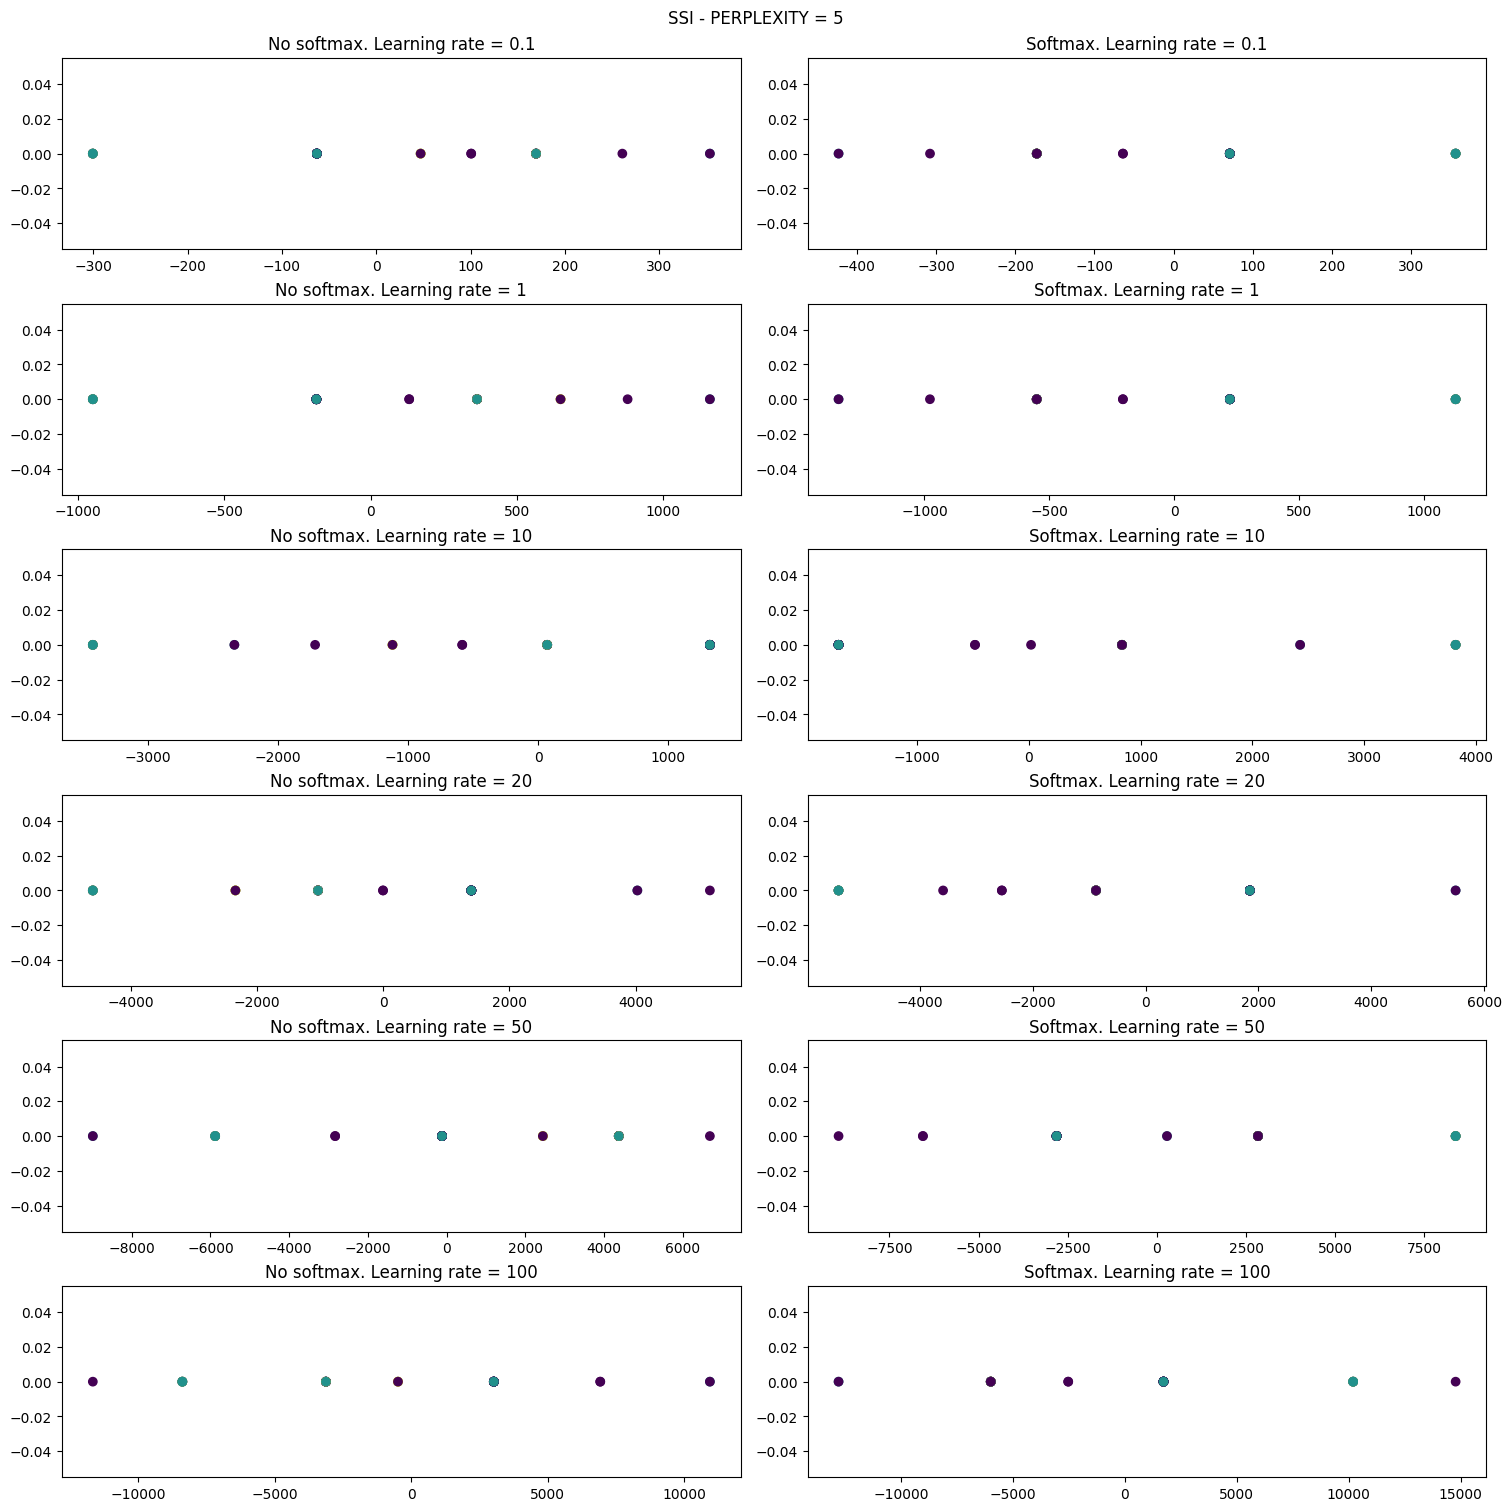

In [ ]:
# ploteamos ssi_pxty5 y softssi_pxty5
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty5[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty5[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 5')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 10')

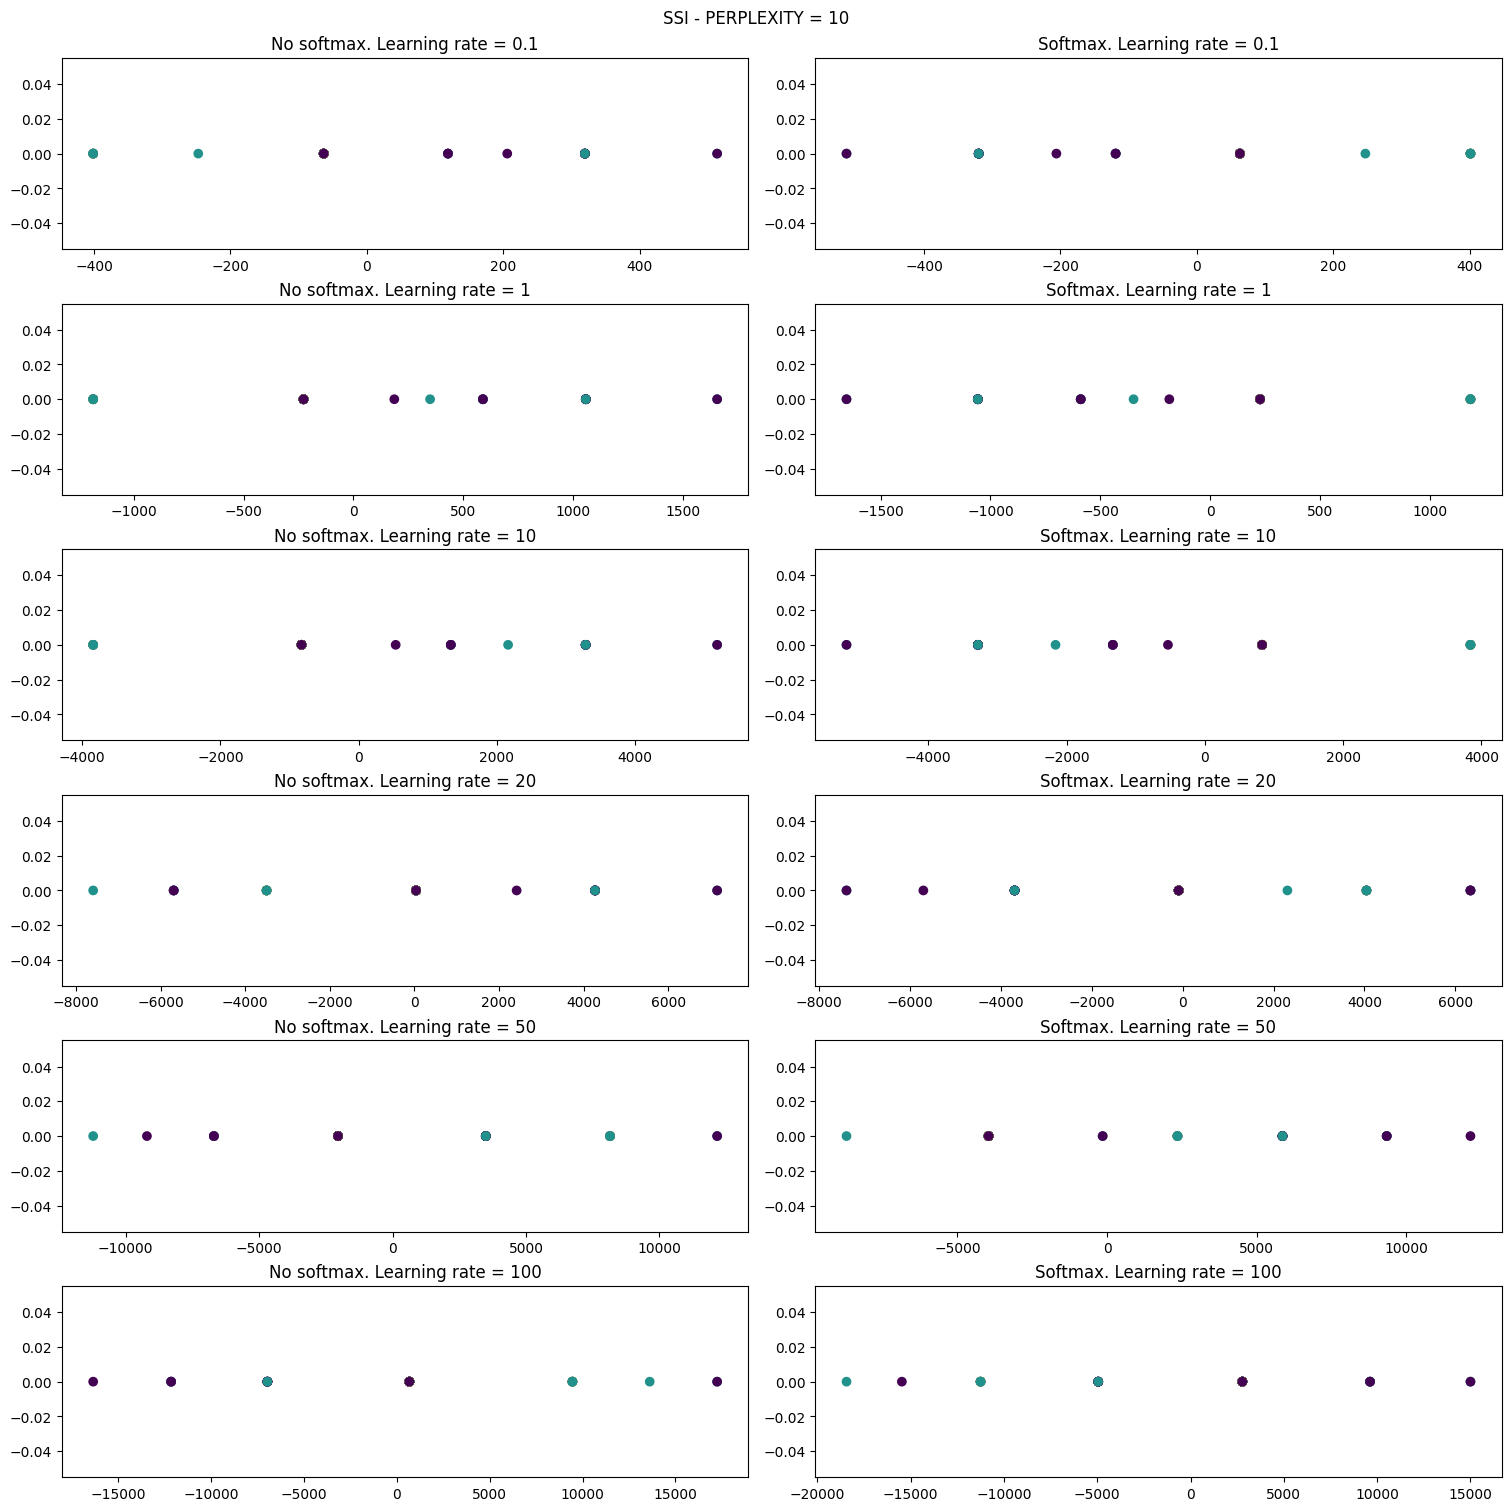

In [ ]:
# ploteamos ssi_pxty10 y softssi_pxty10
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty10[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty10[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 10')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 20')

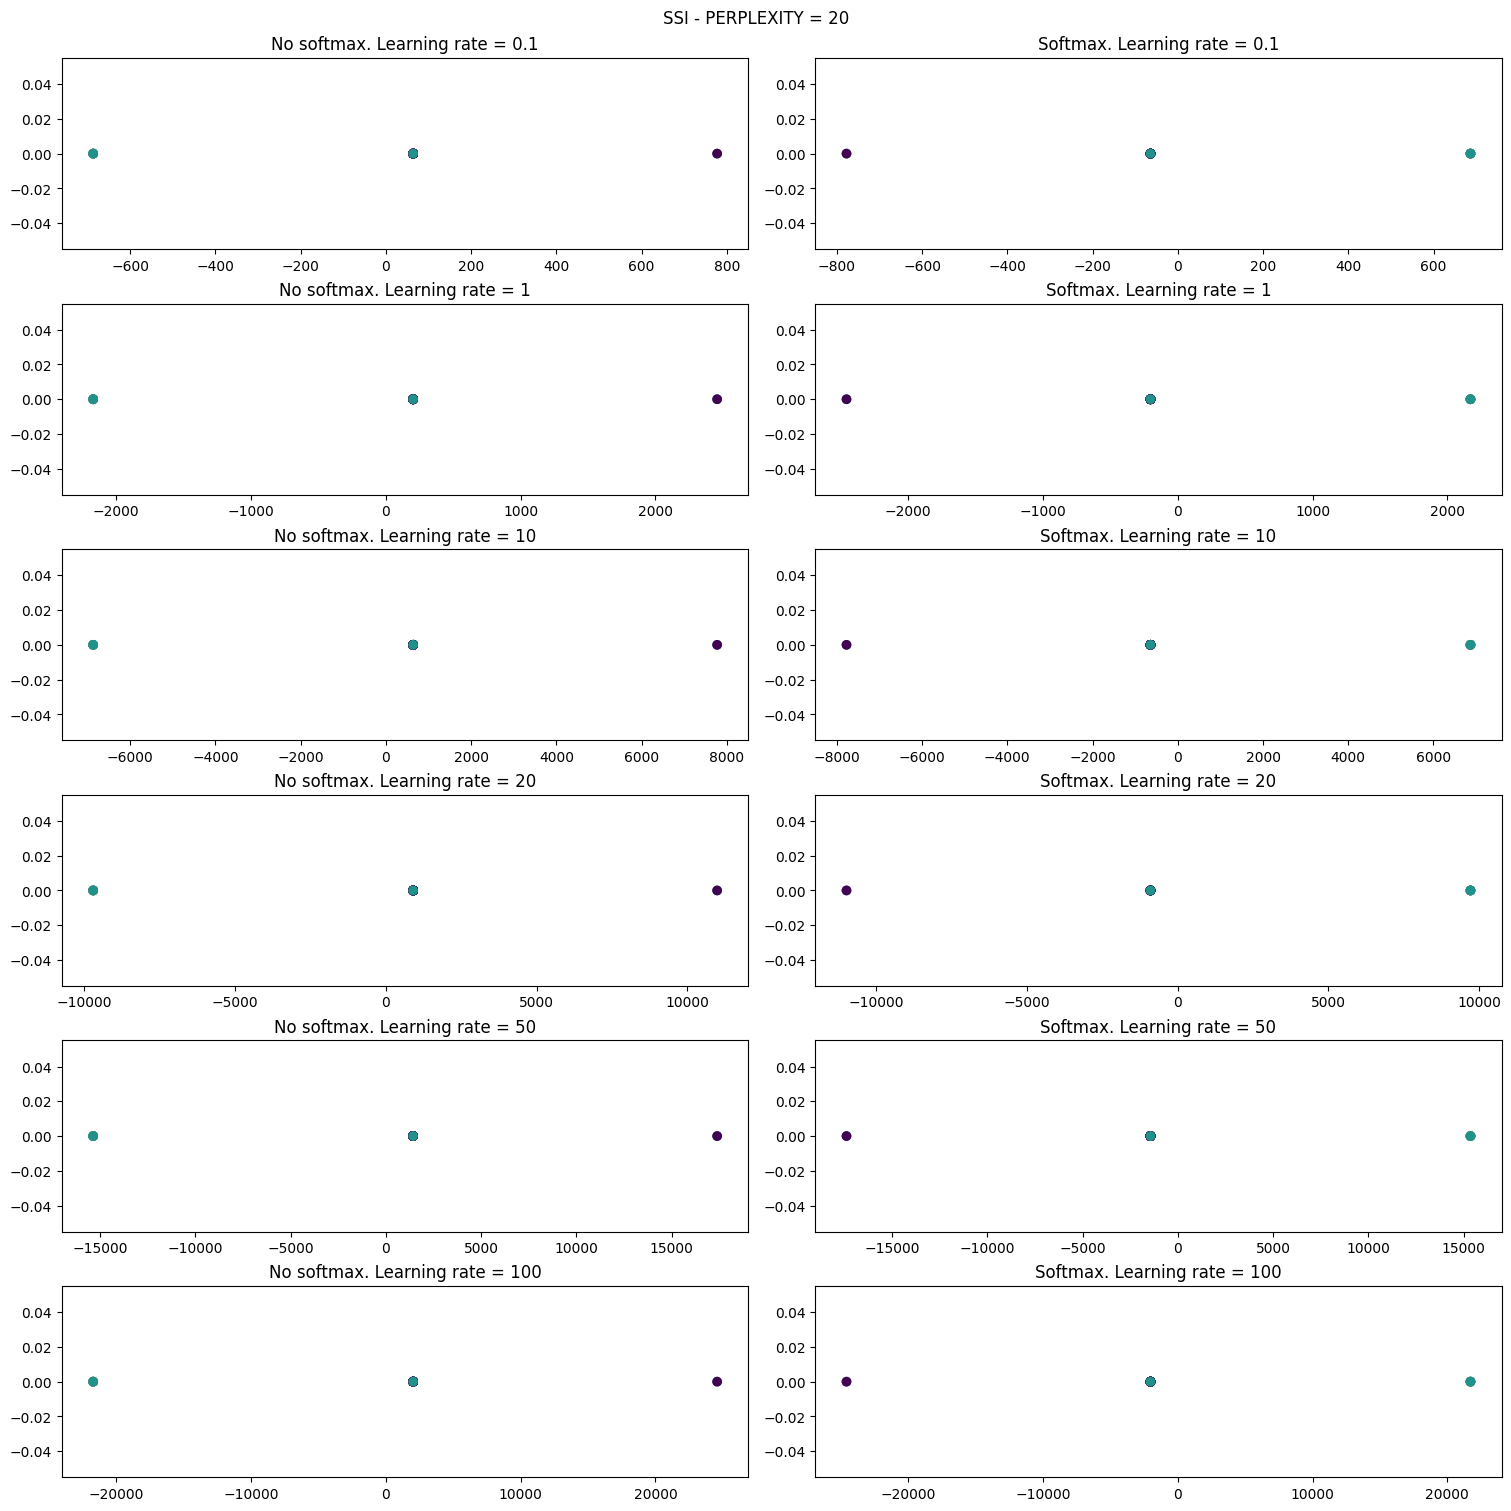

In [ ]:
# ploteamos ssi_pxty20 y softssi_pxty20
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty20[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty20[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 20')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 30')

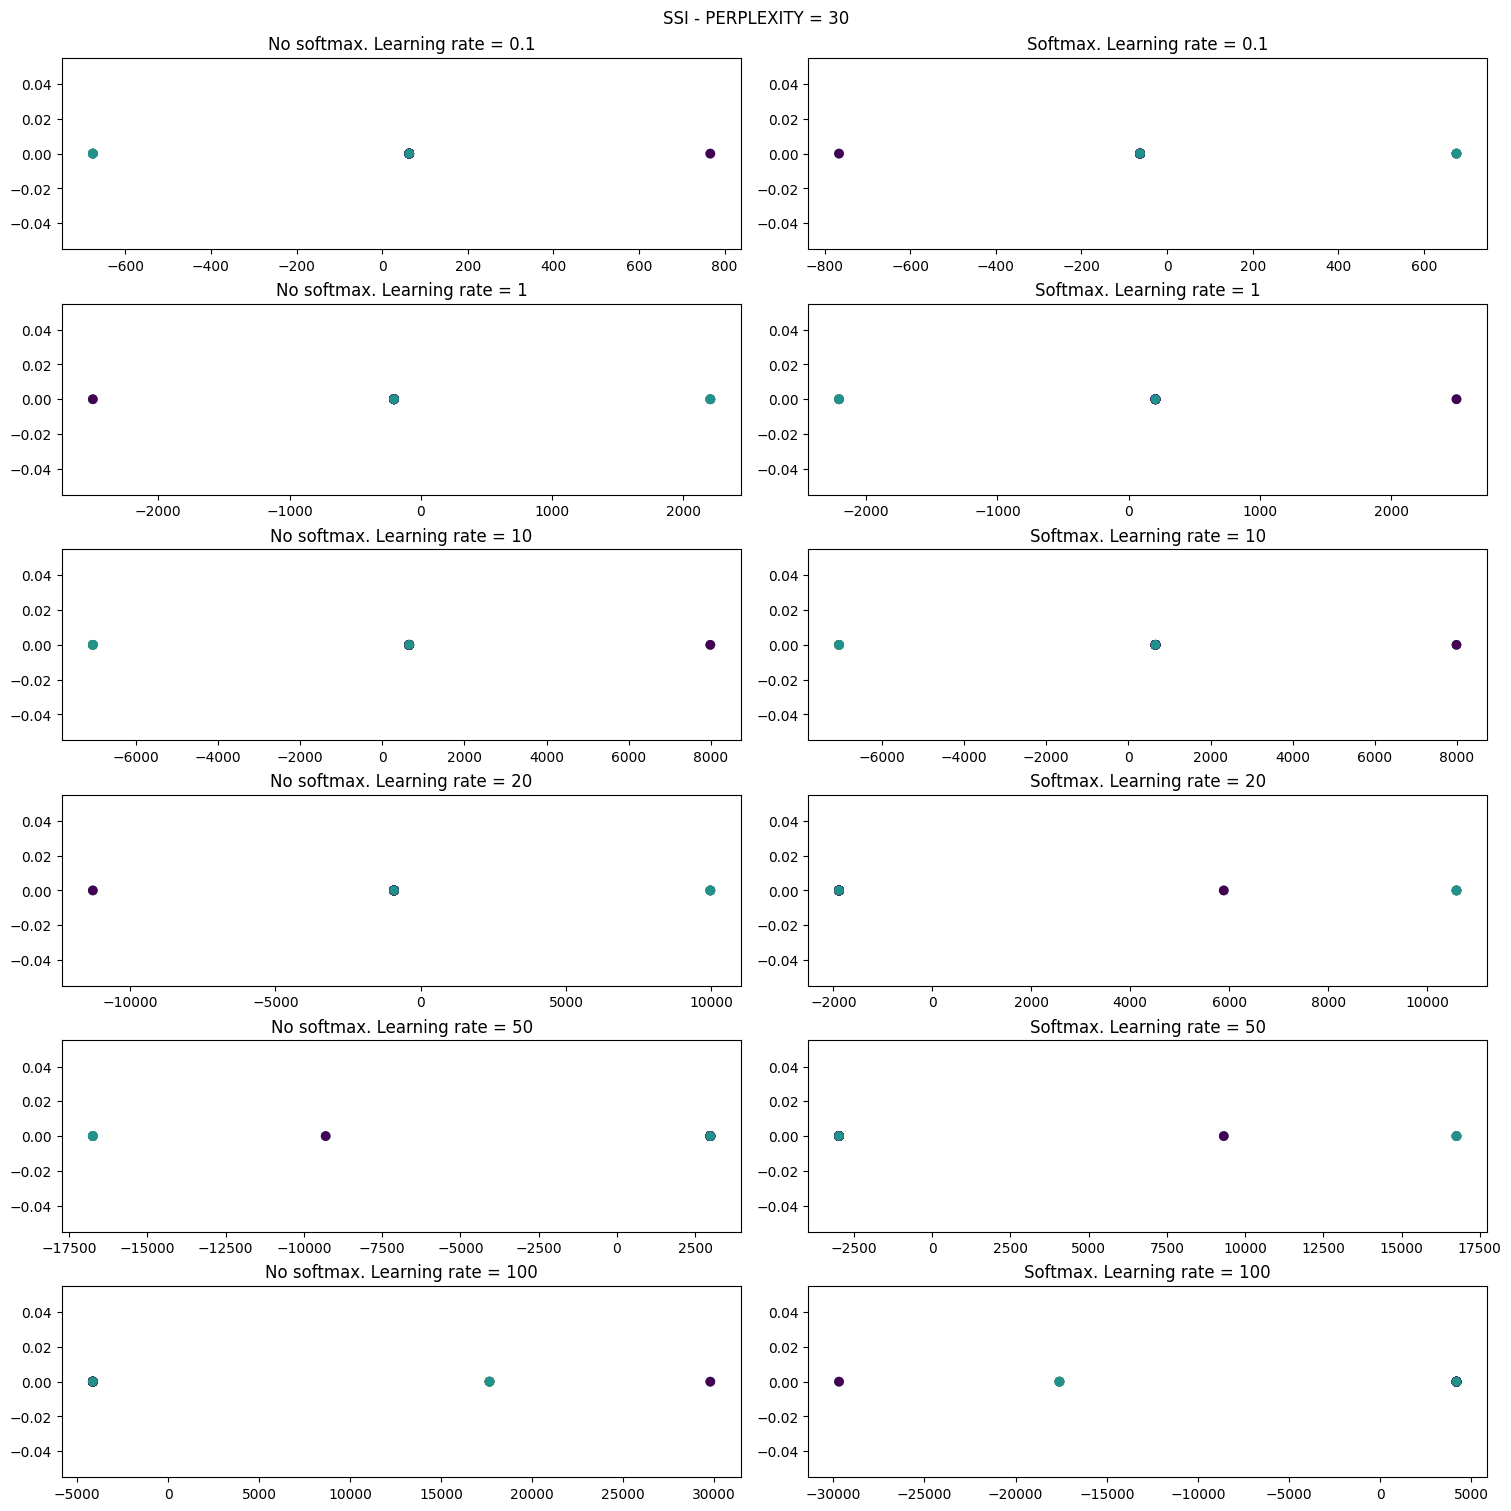

In [ ]:
# ploteamos ssi_pxty30 y softssi_pxty30
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty30[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty30[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 30')

Text(0.5, 0.98, 'SSI - PERPLEXITY = 40')

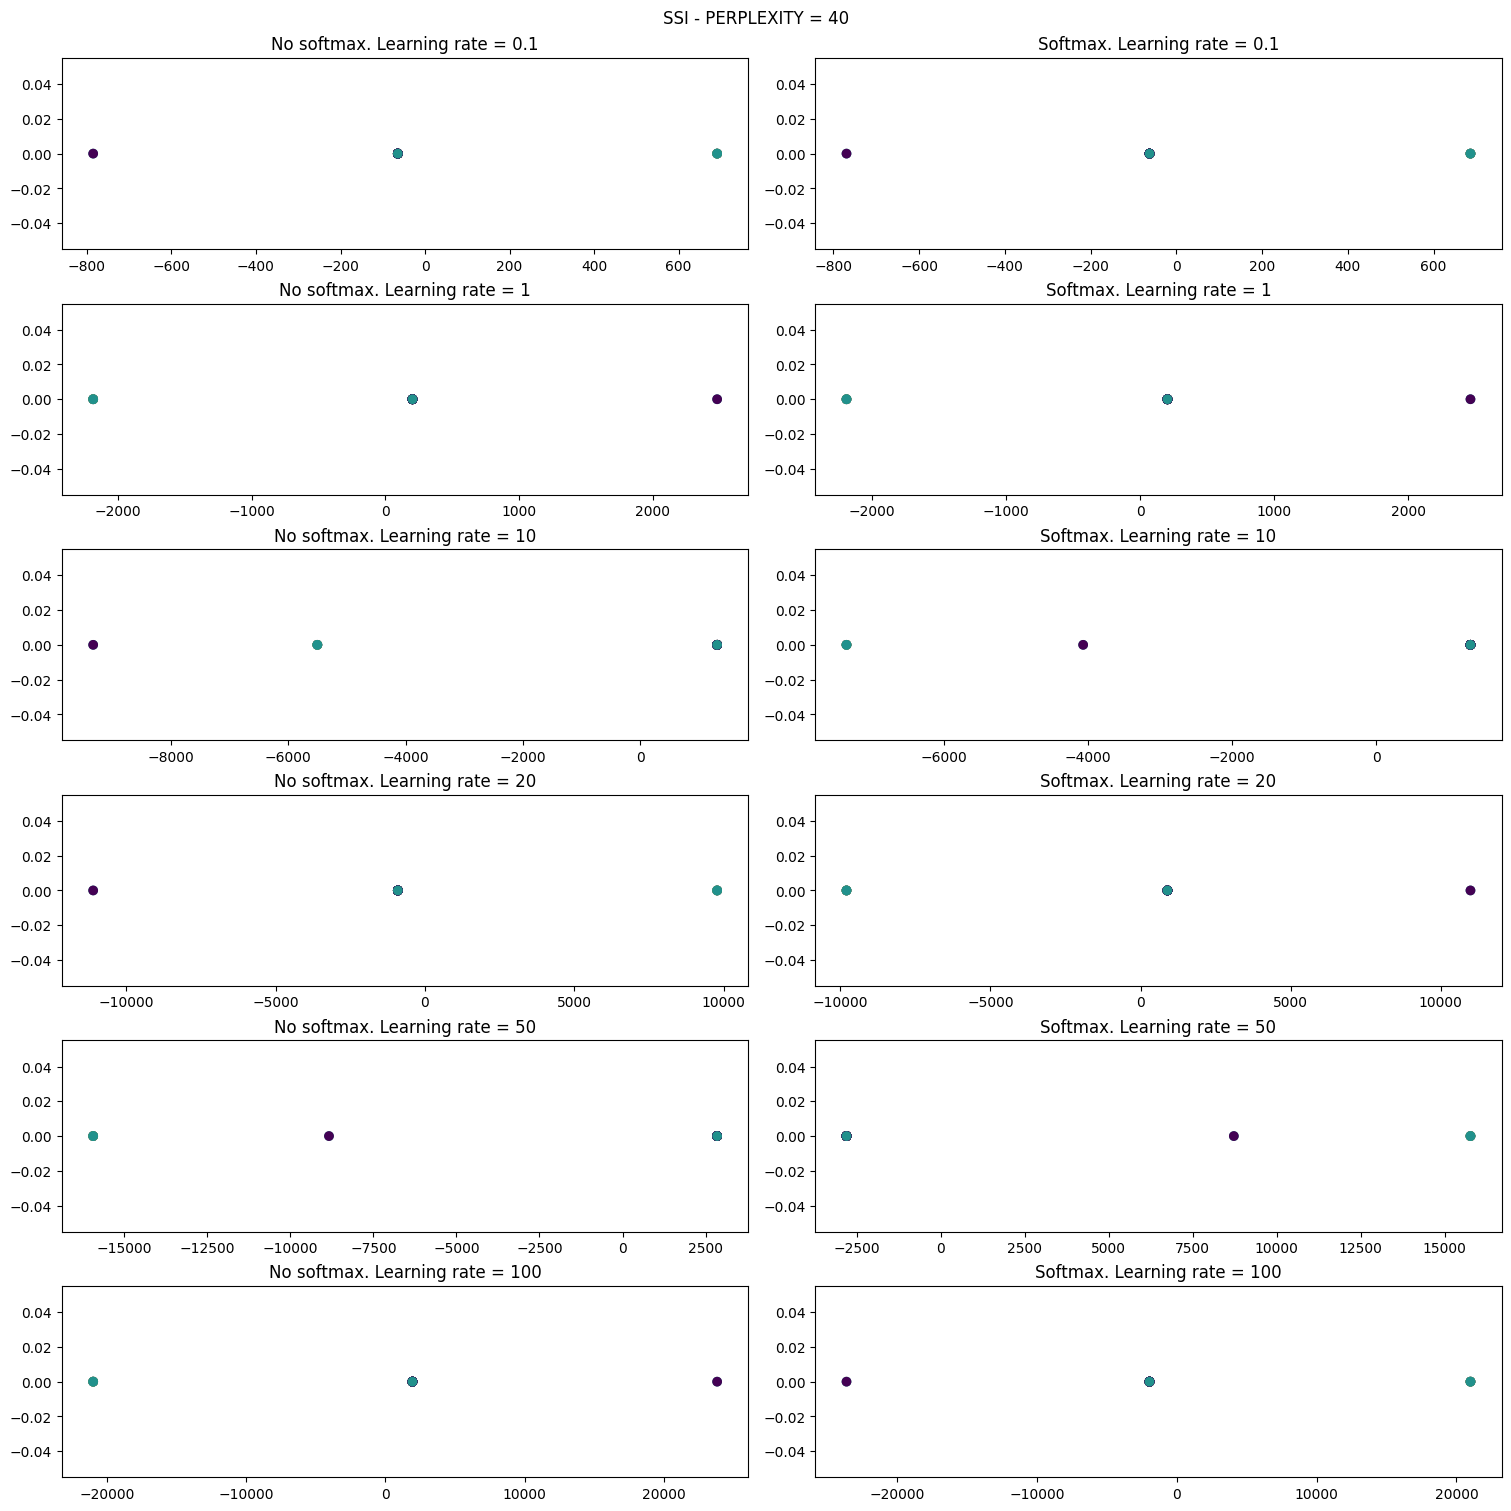

In [ ]:
# ploteamos ssi_pxty40 y softssi_pxty40
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15, 15), layout="constrained")
# array auxiliar para facilitar el ciclo for
auxindx=[[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
for (i,j),x in np.ndenumerate(auxindx):
  if (j%2==1):
    axs[i,j].scatter(np.ravel(softssi_pxty40[int(x/2 - 0.5)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('Softmax. Learning rate = '+str(lr[int(x/2 - 0.5)]))
  else:
    axs[i,j].scatter(np.ravel(ssi_pxty40[int(x/2)]),ssi_y_dummy,c=calif1)
    axs[i,j].set_title('No softmax. Learning rate = '+str(lr[int(x/2)]))
fig.suptitle('SSI - PERPLEXITY = 40')

In [ ]:
from plotly.subplots import make_subplots

# Perplexity 2

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[0].reshape((48,)),
                 y=perf_pxty2[0].reshape((48,)),
                 z=ssi_pxty2[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[0].reshape((48,)),
                 y=softperf_pxty2[0].reshape((48,)),
                 z=softssi_pxty2[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[1].reshape((48,)),
                 y=perf_pxty2[1].reshape((48,)),
                 z=ssi_pxty2[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[1].reshape((48,)),
                 y=softperf_pxty2[1].reshape((48,)),
                 z=softssi_pxty2[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[2].reshape((48,)),
                 y=perf_pxty2[2].reshape((48,)),
                 z=ssi_pxty2[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[2].reshape((48,)),
                 y=softperf_pxty2[2].reshape((48,)),
                 z=softssi_pxty2[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[3].reshape((48,)),
                 y=perf_pxty2[3].reshape((48,)),
                 z=ssi_pxty2[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[3].reshape((48,)),
                 y=softperf_pxty2[3].reshape((48,)),
                 z=softssi_pxty2[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[4].reshape((48,)),
                 y=perf_pxty2[4].reshape((48,)),
                 z=ssi_pxty2[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[4].reshape((48,)),
                 y=softperf_pxty2[4].reshape((48,)),
                 z=softssi_pxty2[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty2[5].reshape((48,)),
                 y=perf_pxty2[5].reshape((48,)),
                 z=ssi_pxty2[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty2[5].reshape((48,)),
                 y=softperf_pxty2[5].reshape((48,)),
                 z=softssi_pxty2[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 2 - Learning Rate: 100")
fig.show()

# Perplexity 3

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[0].reshape((48,)),
                 y=perf_pxty3[0].reshape((48,)),
                 z=ssi_pxty3[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[0].reshape((48,)),
                 y=softperf_pxty3[0].reshape((48,)),
                 z=softssi_pxty3[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[1].reshape((48,)),
                 y=perf_pxty3[1].reshape((48,)),
                 z=ssi_pxty3[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[1].reshape((48,)),
                 y=softperf_pxty3[1].reshape((48,)),
                 z=softssi_pxty3[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[2].reshape((48,)),
                 y=perf_pxty3[2].reshape((48,)),
                 z=ssi_pxty3[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[2].reshape((48,)),
                 y=softperf_pxty3[2].reshape((48,)),
                 z=softssi_pxty3[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[3].reshape((48,)),
                 y=perf_pxty3[3].reshape((48,)),
                 z=ssi_pxty3[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[3].reshape((48,)),
                 y=softperf_pxty3[3].reshape((48,)),
                 z=softssi_pxty3[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[4].reshape((48,)),
                 y=perf_pxty3[4].reshape((48,)),
                 z=ssi_pxty3[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[4].reshape((48,)),
                 y=softperf_pxty3[4].reshape((48,)),
                 z=softssi_pxty3[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty3[5].reshape((48,)),
                 y=perf_pxty3[5].reshape((48,)),
                 z=ssi_pxty3[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty3[5].reshape((48,)),
                 y=softperf_pxty3[5].reshape((48,)),
                 z=softssi_pxty3[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 3 - Learning Rate: 100")
fig.show()

# Perplexity 5

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[0].reshape((48,)),
                 y=perf_pxty5[0].reshape((48,)),
                 z=ssi_pxty5[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[0].reshape((48,)),
                 y=softperf_pxty5[0].reshape((48,)),
                 z=softssi_pxty5[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[1].reshape((48,)),
                 y=perf_pxty5[1].reshape((48,)),
                 z=ssi_pxty5[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[1].reshape((48,)),
                 y=softperf_pxty5[1].reshape((48,)),
                 z=softssi_pxty5[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[2].reshape((48,)),
                 y=perf_pxty5[2].reshape((48,)),
                 z=ssi_pxty5[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[2].reshape((48,)),
                 y=softperf_pxty5[2].reshape((48,)),
                 z=softssi_pxty5[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[3].reshape((48,)),
                 y=perf_pxty5[3].reshape((48,)),
                 z=ssi_pxty5[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[3].reshape((48,)),
                 y=softperf_pxty5[3].reshape((48,)),
                 z=softssi_pxty5[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[4].reshape((48,)),
                 y=perf_pxty5[4].reshape((48,)),
                 z=ssi_pxty5[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[4].reshape((48,)),
                 y=softperf_pxty5[4].reshape((48,)),
                 z=softssi_pxty5[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[5].reshape((48,)),
                 y=perf_pxty5[5].reshape((48,)),
                 z=ssi_pxty5[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty5[5].reshape((48,)),
                 y=softperf_pxty5[5].reshape((48,)),
                 z=softssi_pxty5[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 5 - Learning Rate: 100")
fig.show()

# Perplexity 10

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[0].reshape((48,)),
                 y=perf_pxty10[0].reshape((48,)),
                 z=ssi_pxty10[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[0].reshape((48,)),
                 y=softperf_pxty10[0].reshape((48,)),
                 z=softssi_pxty10[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[1].reshape((48,)),
                 y=perf_pxty10[1].reshape((48,)),
                 z=ssi_pxty10[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[1].reshape((48,)),
                 y=softperf_pxty10[1].reshape((48,)),
                 z=softssi_pxty10[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[2].reshape((48,)),
                 y=perf_pxty10[2].reshape((48,)),
                 z=ssi_pxty10[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[2].reshape((48,)),
                 y=softperf_pxty10[2].reshape((48,)),
                 z=softssi_pxty10[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[3].reshape((48,)),
                 y=perf_pxty10[3].reshape((48,)),
                 z=ssi_pxty10[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[3].reshape((48,)),
                 y=softperf_pxty10[3].reshape((48,)),
                 z=softssi_pxty10[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[4].reshape((48,)),
                 y=perf_pxty10[4].reshape((48,)),
                 z=ssi_pxty10[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[4].reshape((48,)),
                 y=softperf_pxty10[4].reshape((48,)),
                 z=softssi_pxty10[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty10[5].reshape((48,)),
                 y=perf_pxty10[5].reshape((48,)),
                 z=ssi_pxty10[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty10[5].reshape((48,)),
                 y=softperf_pxty10[5].reshape((48,)),
                 z=softssi_pxty10[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 10 - Learning Rate: 100")
fig.show()

# Perplexity 20

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[0].reshape((48,)),
                 y=perf_pxty20[0].reshape((48,)),
                 z=ssi_pxty20[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[0].reshape((48,)),
                 y=softperf_pxty20[0].reshape((48,)),
                 z=softssi_pxty20[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[1].reshape((48,)),
                 y=perf_pxty20[1].reshape((48,)),
                 z=ssi_pxty20[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[1].reshape((48,)),
                 y=softperf_pxty20[1].reshape((48,)),
                 z=softssi_pxty20[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[2].reshape((48,)),
                 y=perf_pxty20[2].reshape((48,)),
                 z=ssi_pxty20[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[2].reshape((48,)),
                 y=softperf_pxty20[2].reshape((48,)),
                 z=softssi_pxty20[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[3].reshape((48,)),
                 y=perf_pxty20[3].reshape((48,)),
                 z=ssi_pxty20[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[3].reshape((48,)),
                 y=softperf_pxty20[3].reshape((48,)),
                 z=softssi_pxty20[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[4].reshape((48,)),
                 y=perf_pxty20[4].reshape((48,)),
                 z=ssi_pxty20[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[4].reshape((48,)),
                 y=softperf_pxty20[4].reshape((48,)),
                 z=softssi_pxty20[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty20[5].reshape((48,)),
                 y=perf_pxty20[5].reshape((48,)),
                 z=ssi_pxty20[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty20[5].reshape((48,)),
                 y=softperf_pxty20[5].reshape((48,)),
                 z=softssi_pxty20[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 20 - Learning Rate: 100")
fig.show()

# Perplexity 30

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[0].reshape((48,)),
                 y=perf_pxty30[0].reshape((48,)),
                 z=ssi_pxty30[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[0].reshape((48,)),
                 y=softperf_pxty30[0].reshape((48,)),
                 z=softssi_pxty30[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[1].reshape((48,)),
                 y=perf_pxty30[1].reshape((48,)),
                 z=ssi_pxty30[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[1].reshape((48,)),
                 y=softperf_pxty30[1].reshape((48,)),
                 z=softssi_pxty30[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[2].reshape((48,)),
                 y=perf_pxty30[2].reshape((48,)),
                 z=ssi_pxty30[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[2].reshape((48,)),
                 y=softperf_pxty30[2].reshape((48,)),
                 z=softssi_pxty30[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[3].reshape((48,)),
                 y=perf_pxty30[3].reshape((48,)),
                 z=ssi_pxty30[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[3].reshape((48,)),
                 y=softperf_pxty30[3].reshape((48,)),
                 z=softssi_pxty30[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[4].reshape((48,)),
                 y=perf_pxty30[4].reshape((48,)),
                 z=ssi_pxty30[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[4].reshape((48,)),
                 y=softperf_pxty30[4].reshape((48,)),
                 z=softssi_pxty30[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty30[5].reshape((48,)),
                 y=perf_pxty30[5].reshape((48,)),
                 z=ssi_pxty30[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty30[5].reshape((48,)),
                 y=softperf_pxty30[5].reshape((48,)),
                 z=softssi_pxty30[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 30 - Learning Rate: 100")
fig.show()

# Perplexity 40

In [ ]:
# Learning rate 0.1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[0].reshape((48,)),
                 y=perf_pxty40[0].reshape((48,)),
                 z=ssi_pxty40[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[0].reshape((48,)),
                 y=softperf_pxty40[0].reshape((48,)),
                 z=softssi_pxty40[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 0.1")
fig.show()

In [ ]:
# Learning rate 1

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[1].reshape((48,)),
                 y=perf_pxty40[1].reshape((48,)),
                 z=ssi_pxty40[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[1].reshape((48,)),
                 y=softperf_pxty40[1].reshape((48,)),
                 z=softssi_pxty40[1].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 1")
fig.show()

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[2].reshape((48,)),
                 y=perf_pxty40[2].reshape((48,)),
                 z=ssi_pxty40[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[2].reshape((48,)),
                 y=softperf_pxty40[2].reshape((48,)),
                 z=softssi_pxty40[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 10")
fig.show()

In [ ]:
# Learning rate 20

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[3].reshape((48,)),
                 y=perf_pxty40[3].reshape((48,)),
                 z=ssi_pxty40[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[3].reshape((48,)),
                 y=softperf_pxty40[3].reshape((48,)),
                 z=softssi_pxty40[3].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 20")
fig.show()

In [ ]:
# Learning rate 50

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[4].reshape((48,)),
                 y=perf_pxty40[4].reshape((48,)),
                 z=ssi_pxty40[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[4].reshape((48,)),
                 y=softperf_pxty40[4].reshape((48,)),
                 z=softssi_pxty40[4].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 50")
fig.show()

In [ ]:
# Learning rate 100

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty40[5].reshape((48,)),
                 y=perf_pxty40[5].reshape((48,)),
                 z=ssi_pxty40[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[5].reshape((48,)),
                 y=softperf_pxty40[5].reshape((48,)),
                 z=softssi_pxty40[5].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 100")
fig.show()

# Tests

In [ ]:
# Learning rate 10

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("No Softmax", "Softmax"),
                    specs=[ [{'type':'scatter3d'} , {'type':'scatter3d'}] ])

fig.add_trace(
    go.Scatter3d(x=das_pxty5[5].reshape((48,)),
                 y=perf_pxty20[0].reshape((48,)),
                 z=ssi_pxty2[0].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=softdas_pxty40[2].reshape((48,)),
                 y=softperf_pxty40[2].reshape((48,)),
                 z=softssi_pxty40[2].reshape((48,)),
                 mode='markers',
                 marker=dict(color=calif1,size=4)),
    row=1, col=2
)

fig.update_layout(height=600, width=1000, title_text="Perplexity 40 - Learning Rate: 10")
fig.show()